# Mineria de Datos - ICFES SABER PRO 2019

## Limpieza y Preparacion

El siguiente Python Notebook contiene el codigo que permite realizar el Analisis de Datos para los resultados del Icfes Saber Pro 2019 de estudiantes de ingenieria industrial.

Se importan las librerias que se usaran y se configura el estilo de graficas y dataframes

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

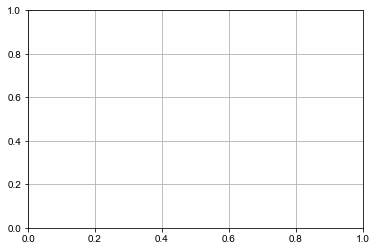

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

plt.grid(True)
sns.set_theme(style="whitegrid")

Se importan las bases de datos y se preprocesan para su union. 

Para el estudio se usaron las bases de datos de los resultados del examen Saber Pro del año 2019. Estas se encuentran en dos archivos con extensión “.csv”, que corresponden a los módulos de las pruebas genéricas (las cuales se usan para evaluar a todos los estudiantes), y las pruebas específicas (que dependen del tipo de carrera). Estas bases de datos se pueden descargar en el portal Datos Abiertos suministrados directamente por el ICFES.

La base de datos de pruebas genéricas está compuesta por 260756 entradas de datos y 105 columnas con información que las caracterizan. En la base de datos se encuentra la información personal de los estudiantes, los datos de contacto, datos académicos, socioeconómicos, la información sobre su Institución de Educación Superior (IES), la citación al examen, su resultado en las competencias genéricas e información adicional; discretizada por medio de diferentes tipos de variables. 
Por su parte, en la base de datos de las pruebas específicas se encuentran los resultados de los diferentes módulos o subtemas que se evalúan en cada estudiante, dependiendo de su carrera profesional. La base de datos se compone de 401815 entradas en las filas y cinco columnas (el código del estudiante, el código de la prueba específica, el nombre de la prueba específica, el puntaje y el desempeño del estudiante). Para el caso de los estudiantes de ingeniería industrial, se evalúan tres módulos de competencias específicas:

●	Formulación de proyectos de ingeniería.
●	Diseño de sistemas productivos y logísticos.
●	Pensamiento científico - matemáticas y estadística.


In [4]:
path_pruebas_genericas = 'Resultados_Saber_Pro_Competencias_Genericas_2019-2.csv'
path_pruebas_especificas = 'Resultados_Saber_Pro_Competencias_Especificas_2019-2.csv'

In [5]:
database = pd.read_csv( path_pruebas_genericas , low_memory= False )

database.drop( 
    database[database['ESTU_PRGM_ACADEMICO'] != 'INGENIERIA INDUSTRIAL'].index, inplace=True )

In [6]:
database1= pd.read_csv( path_pruebas_especificas , low_memory= False )

database1.loc[
    database1['RESULT_NOMBREPRUEBA'] == 'DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS',
    'MOD_SISTEMAS_PRODUCTIVOS_PNAL'] = database1['RESULT_PUNTAJE']    

database1.loc[
    database1['RESULT_NOMBREPRUEBA'] == 'DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS',
    'MOD_SISTEMAS_PRODUCTIVOS_DESEM'] = database1['RESULT_DESEMPENO'] 

database1.loc[
    database1['RESULT_NOMBREPRUEBA'] == 'FORMULACIÓN DE PROYECTOS DE INGENIERÍA',
    'MOD_FORMULACION_PROYECTOS_PNAL'] = database1['RESULT_PUNTAJE'] 

database1.loc[
    database1['RESULT_NOMBREPRUEBA'] == 'FORMULACIÓN DE PROYECTOS DE INGENIERÍA',
    'MOD_FORMULACION_PROYECTOS_DESEM'] = database1['RESULT_DESEMPENO']

database1.loc[
    database1['RESULT_NOMBREPRUEBA'] == 'PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA',
    'MOD_MATEMATICAS_ESTADISTICAS_PNAL'] = database1['RESULT_PUNTAJE'] 

database1.loc[
    database1['RESULT_NOMBREPRUEBA'] == 'PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA',
    'MOD_MATEMATICAS_ESTADISTICAS_DESEM'] = database1['RESULT_DESEMPENO']

database1.drop( ['RESULT_CODIGOPRUEBA', 'RESULT_NOMBREPRUEBA', 'RESULT_PUNTAJE', 'RESULT_DESEMPENO'], axis = 1, inplace = True)
database1 = database1.groupby('ESTU_CONSECUTIVO').agg('max')


Previo a la utilización de la base de datos en el estudio, es indispensable realizar un proceso de filtrado, selección y limpieza de datos porque, a pesar de que la información del Icfes es totalmente confiable, esta posee la información general de todas las carreras, información que no es de utilidad para este estudio y datos erróneos o nulos que pueden alterar los resultados del análisis.


Como se mencionó previamente, la información de interés para este estudio se encuentra distribuida en dos archivos de bases de datos. Es por esta razón que, antes del proceso de filtrado y limpieza, es de utilidad tener la información de ambas bases de datos en una misma. Para hacerlo, los resultados de las pruebas genéricas (“database”) y la de las pruebas específicas (“database1”), se unieron a través de la variable “ESTU_CONSECUTIVO”, que es el código público del estudiante. 
Teniendo definida la base de datos completa, es posible emplear filtros y limpieza sobre los datos, para obtener la fracción de la base de datos que se usará en el estudio.  A continuación, se describirán los filtros usados y los ajustes hechos, de modo que, no existan datos erróneos o nulos que afecten los resultados del análisis. 
En primer lugar, se procede a eliminar datos que no serán usados en el estudio usando el método “drop” de Pandas, entre ellos:


- Los programas académicos diferentes al de ingeniería industrial.
- Los datos de los estudiantes que realizaron las pruebas en el exterior porque no realizaron el examen de pruebas específicas. 
- Los datos que corresponden a las pruebas aplicadas en años diferentes al 2019 y que no corresponden al segundo periodo de evaluación en el año.
- Los casos que están en proceso de investigación en el Icfes.


También, se eliminan los puntajes de las pruebas genéricas y específicas que tienen valores nulos y, por ende, serán descartadas del estudio. Por último, se eliminan las columnas de las variables que corresponden principalmente a información general sin variabilidad de los estudiantes, la información de la IES y su programa académico, entre otros, ya que no son necesarias para los objetivos del estudio y posteriormente no se usarán en ningún proceso.


In [7]:

database = pd.merge(database, database1, how= 'left', on= 'ESTU_CONSECUTIVO')

database.drop( database[database['ESTU_EXTERIOR'] == 'SI'].index , inplace= True)
database.drop( database[database['PERIODO'] != 20195].index , inplace= True)
database.drop( database[database['ESTU_ESTADOINVESTIGACION'] == 'VALIDEZ OFICINA JURÍDICA'].index , inplace= True)
database.drop( database[database['MOD_SISTEMAS_PRODUCTIVOS_PNAL'].isnull() ].index , inplace= True)
database.drop( database[database['MOD_FORMULACION_PROYECTOS_PNAL'].isnull() ].index , inplace= True)
database.drop( database[database['MOD_MATEMATICAS_ESTADISTICAS_PNAL'].isnull() ].index , inplace= True)
database.drop( database[database['MOD_RAZONA_CUANTITAT_PUNT'].isnull() ].index , inplace= True)
database.drop( database[database['MOD_INGLES_PNAL'].isnull() ].index , inplace= True)

database.drop(columns= [
    
    'ESTU_TIPODOCUMENTO',
    'ESTU_NACIONALIDAD',
    'ESTU_FECHANACIMIENTO',
    'ESTU_EXTERIOR',
    'PERIODO',
    'ESTU_ESTUDIANTE',
    'ESTU_PAIS_RESIDE',
    'ESTU_DISC_FISICA',
    'ESTU_DISC_SISTEM',
    'ESTU_DISC_AUDITCASTELL',
    'ESTU_DISC_AUDITLSC',
    'ESTU_DISC_VISUALCEGUE',
    'ESTU_DISC_VISUALBAJA' ,
    'ESTU_DISC_VOZHABLA',
    'ESTU_DISC_INTELEC',
    'ESTU_DISC_SORDOCEGUERA',
    'ESTU_DISC_PSICOSOCIAL',
    'ESTU_DISC_ASPERGER',
    'ESTU_MCPIO_RESIDE',
    'ESTU_COLE_TERMINO',
    'ESTU_OTROCOLE_TERMINO',
    'ESTU_CODDANE_COLE_TERMINO',
    'ESTU_COD_COLE_MCPIO_TERMINO',
    'ESTU_TIPODOCUMENTOSB11',
    'ESTU_PRGM_ACADEMICO',
    'ESTU_SNIES_PRGMACADEMICO',
    'ESTU_PRGM_CODMUNICIPIO',
    'ESTU_PRGM_MUNICIPIO',
    'ESTU_PRGM_DEPARTAMENTO',
    'ESTU_NIVEL_PRGM_ACADEMICO',
    'ESTU_METODO_PRGM',
    'ESTU_NUCLEO_PREGRADO',
    'ESTU_INST_CODMUNICIPIO',
    'ESTU_PRIVADO_LIBERTAD',
    'ESTU_COD_MCPIO_PRESENTACION' ,
    'ESTU_MCPIO_PRESENTACION' ,
    'ESTU_DEPTO_PRESENTACION',
    'ESTU_COD_DEPTO_PRESENTACION',
    'MOD_RAZONA_CUANTITATIVO_PNAL',
    'MOD_RAZONA_CUANTITATIVO_PNBC',
    'MOD_LECTURA_CRITICA_PNAL',
    'MOD_LECTURA_CRITICA_PNBC',
    'MOD_COMPETEN_CIUDADA_PNAL',
    'MOD_COMPETEN_CIUDADA_PNBC',
    'MOD_INGLES_PNAL',
    'MOD_INGLES_PNBC',
    'MOD_COMUNI_ESCRITA_PNAL',
    'MOD_COMUNI_ESCRITA_PNBC',
    'PERCENTIL_NBC',
    'ESTU_INSE_INDIVIDUAL',
    'ESTU_NSE_INDIVIDUAL',
    'ESTU_NSE_IES',
    'ESTU_ESTADOINVESTIGACION',
    'INST_COD_INSTITUCION',
    'ESTU_COD_RESIDE_MCPIO',
    'ESTU_COD_RESIDE_DEPTO',
    'ESTU_DEPTO_RESIDE',
    'ESTU_CONSECUTIVO',
    'PUNT_GLOBAL',
    'PERCENTIL_GLOBAL',
    'MOD_RAZONA_CUANTITAT_DESEM',
    'MOD_LECTURA_CRITICA_DESEM',
    'MOD_COMPETEN_CIUDADA_DESEM',
    'MOD_INGLES_DESEM',
    'MOD_COMUNI_ESCRITA_DESEM',
    'MOD_SISTEMAS_PRODUCTIVOS_DESEM',
    'MOD_FORMULACION_PROYECTOS_DESEM',
    'MOD_MATEMATICAS_ESTADISTICAS_DESEM',
    'ESTU_SEMESTRECURSA',
    'ESTU_INST_DEPARTAMENTO'
    
    ], inplace = True )

Se remplazan datos nulos en algunas columnas por ceros, se calcula el puntaje Global y se eliminan los datos cuyo componente de comunicacion escrita fue anulado

In [8]:
database.isna().sum()

ESTU_GENERO                             0
ESTU_AREARESIDE                        37
ESTU_VALORMATRICULAUNIVERSIDAD         46
ESTU_PAGOMATRICULABECA                 49
ESTU_PAGOMATRICULACREDITO              49
ESTU_PAGOMATRICULAPADRES               49
ESTU_PAGOMATRICULAPROPIO               47
ESTU_COMOCAPACITOEXAMENSB11            37
ESTU_CURSODOCENTESIES                8387
ESTU_CURSOIESAPOYOEXTERNO            8388
ESTU_CURSOIESEXTERNA                 8388
ESTU_SIMULACROTIPOICFES              8388
ESTU_ACTIVIDADREFUERZOAREAS          8387
ESTU_ACTIVIDADREFUERZOGENERIC        8387
FAMI_EDUCACIONPADRE                   345
FAMI_EDUCACIONMADRE                   343
FAMI_ESTRATOVIVIENDA                  505
FAMI_TIENEINTERNET                    361
FAMI_TIENECOMPUTADOR                  391
FAMI_TIENELAVADORA                    390
FAMI_TIENEHORNOMICROOGAS              395
FAMI_TIENESERVICIOTV                  374
FAMI_TIENEAUTOMOVIL                   395
FAMI_TIENEMOTOCICLETA             

In [9]:
database.drop( columns= [
    'ESTU_CURSODOCENTESIES',
    'ESTU_CURSOIESAPOYOEXTERNO',
    'ESTU_CURSOIESEXTERNA',
    'ESTU_SIMULACROTIPOICFES',
    'ESTU_ACTIVIDADREFUERZOAREAS',
    'ESTU_ACTIVIDADREFUERZOGENERIC'
], inplace = True )

database.dropna(inplace=True)

database['GLOBAL_PUNT'] = database[['MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT','MOD_SISTEMAS_PRODUCTIVOS_PNAL','MOD_FORMULACION_PROYECTOS_PNAL','MOD_MATEMATICAS_ESTADISTICAS_PNAL']].mean(axis=1)

database.drop( database[database['MOD_COMUNI_ESCRITA_PUNT'] == 0 ].index , inplace= True)

## Pre - Exploracion
Se exploran los tipos de variables y la distribucion de los datos, con el fin saber la naturaleza de las variables (Numericas o categoricas)

In [10]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440 entries, 1 to 10762
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ESTU_GENERO                        8440 non-null   object 
 1   ESTU_AREARESIDE                    8440 non-null   object 
 2   ESTU_VALORMATRICULAUNIVERSIDAD     8440 non-null   object 
 3   ESTU_PAGOMATRICULABECA             8440 non-null   object 
 4   ESTU_PAGOMATRICULACREDITO          8440 non-null   object 
 5   ESTU_PAGOMATRICULAPADRES           8440 non-null   object 
 6   ESTU_PAGOMATRICULAPROPIO           8440 non-null   object 
 7   ESTU_COMOCAPACITOEXAMENSB11        8440 non-null   object 
 8   FAMI_EDUCACIONPADRE                8440 non-null   object 
 9   FAMI_EDUCACIONMADRE                8440 non-null   object 
 10  FAMI_ESTRATOVIVIENDA               8440 non-null   object 
 11  FAMI_TIENEINTERNET                 8440 non-null   obje

Text(0.5, 1.0, 'Distribución Resultados Pruebas Saber 2019 \n Asimetria: 0.34\n Curtosis: -0.36')

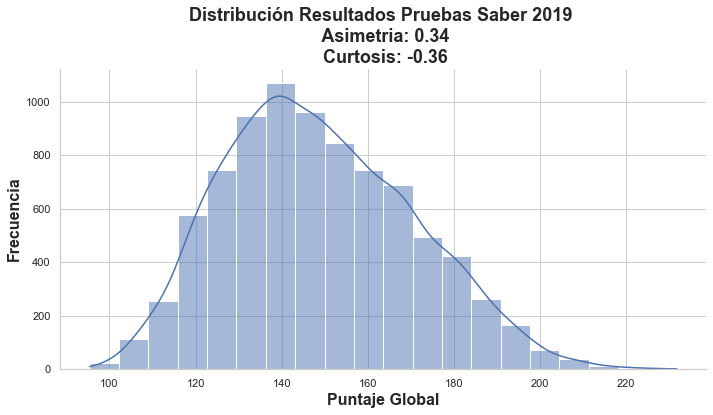

In [11]:

mu = np.mean(database['GLOBAL_PUNT']); std = np.std(database['GLOBAL_PUNT'])
sns.displot(data = database, x = 'GLOBAL_PUNT' , bins = 20 , kde = True , height = 5, aspect = 2)
plt.xlabel('Puntaje Global', fontsize = 16, fontweight = 'bold')
plt.ylabel('Frecuencia', fontsize = 16, fontweight = 'bold')
plt.title('Distribución Resultados Pruebas Saber 2019 \n Asimetria: {:.2f}\n Curtosis: {:.2f}'.format(float(database['GLOBAL_PUNT'].skew(), ), database['GLOBAL_PUNT'].kurt()), fontsize = 18, fontweight = 'bold')


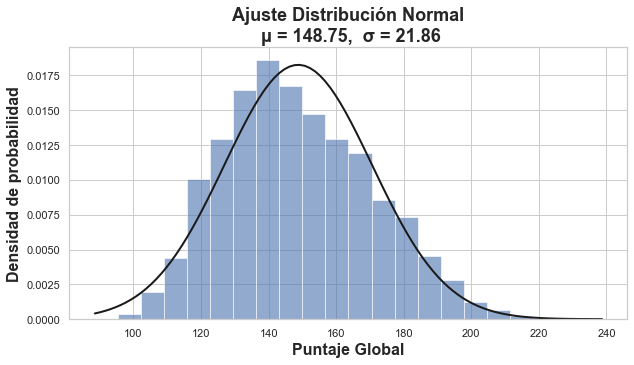

In [12]:
from scipy.stats import norm
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Fit a normal distribution to the data:
mu, std = norm.fit(database['GLOBAL_PUNT'])

# Plot the histogram.
plt.hist( database['GLOBAL_PUNT'], bins = 20, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Ajuste Distribución Normal\n μ = %.2f,  σ = %.2f' % (mu, std), fontsize = 18 , fontweight = 'bold')
plt.xlabel('Puntaje Global', fontsize = 16, fontweight ='bold')
plt.ylabel('Densidad de probabilidad', fontsize = 16, fontweight = 'bold')

plt.show()

## Preprocesamiento


Después del preprocesamiento la base de datos contiene toda la información que es relevante para el estudio, sin embargo, la representación de algunas variables puede no ser eficiente y por esto, una mejora en la calidad de los datos y en su representación, es necesaria para reducir la dimensionalidad y simplificar la tabla de datos (Timarán y cols., 2016). 

Se inicia con la codificación de las variables que pueden tener sólo dos tipos de valores, en una representación numérica binaria (de ceros y unos). A modo de ejemplo, la variable “ESTU_GENERO” que identifica el género del estudiante, se representa por medio de M o F, para indicar si es masculino o femenino. Luego de la codificación, se representarán con un 0 o un 1. Lo mismo aplica para la variable “ESTU_AREARESIDE” y “ESTU_PAGOMATRICULABECA”, cuyos valores eran “Área rural” o “Cabecera municipal” y “Si” o “No”, respectivamente; así como para las variables restantes de este tipo.  


### Codificacion de variables binarias.

In [13]:
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()

database['ESTU_GENERO_CAT'] = labelencoder.fit_transform(database['ESTU_GENERO'])
database['ESTU_AREARESIDE_CAT'] = labelencoder.fit_transform(database['ESTU_AREARESIDE'])
database['ESTU_PAGOMATRICULABECA_CAT'] = labelencoder.fit_transform(database['ESTU_PAGOMATRICULABECA'])
database['ESTU_PAGOMATRICULACREDITO_CAT'] = labelencoder.fit_transform(database['ESTU_PAGOMATRICULACREDITO'])
database['ESTU_PAGOMATRICULAPADRES_CAT'] = labelencoder.fit_transform(database['ESTU_PAGOMATRICULAPADRES'])
database['ESTU_PAGOMATRICULAPROPIO_CAT'] = labelencoder.fit_transform(database['ESTU_PAGOMATRICULAPROPIO'])
database['FAMI_TIENEINTERNET_CAT'] = labelencoder.fit_transform(database['FAMI_TIENEINTERNET'])
database['FAMI_TIENECOMPUTADOR_CAT'] = labelencoder.fit_transform(database['FAMI_TIENECOMPUTADOR'])
database['FAMI_TIENELAVADORA_CAT'] = labelencoder.fit_transform(database['FAMI_TIENELAVADORA'])
database['FAMI_TIENEHORNOMICROOGAS_CAT'] = labelencoder.fit_transform(database['FAMI_TIENEHORNOMICROOGAS'])
database['FAMI_TIENESERVICIOTV_CAT'] = labelencoder.fit_transform(database['FAMI_TIENESERVICIOTV'])
database['FAMI_TIENEAUTOMOVIL_CAT'] = labelencoder.fit_transform(database['FAMI_TIENEAUTOMOVIL'])
database['FAMI_TIENEMOTOCICLETA_CAT'] = labelencoder.fit_transform(database['FAMI_TIENEMOTOCICLETA'])
database['FAMI_TIENECONSOLAVIDEOJUEGOS_CAT'] = labelencoder.fit_transform(database['FAMI_TIENECONSOLAVIDEOJUEGOS'])

### Codificacion de Variables Ordinales.

En el caso de las variables categóricas ordinales, que pueden tener más de dos tipos de valores, es conveniente realizar una representación numérica ordinal que conserve su significado. A continuación, se presentará la lista de variables que fueron codificadas para que sus posibles valores fueran representados por valores numéricos:

In [14]:
conditions  = [database['ESTU_VALORMATRICULAUNIVERSIDAD'] == 'No pagó matrícula', 
               database['ESTU_VALORMATRICULAUNIVERSIDAD'] == 'Menos de 500 mil', 
               database['ESTU_VALORMATRICULAUNIVERSIDAD'] == 'Entre 500 mil y menos de 1 millón' , 
               database['ESTU_VALORMATRICULAUNIVERSIDAD'] == 'Entre 1 millón y menos de 2.5 millones',
               database['ESTU_VALORMATRICULAUNIVERSIDAD'] == 'Entre 2.5 millones y menos de 4 millones',
               database['ESTU_VALORMATRICULAUNIVERSIDAD'] == 'Entre 4 millones y menos de 5.5 millones',
               database['ESTU_VALORMATRICULAUNIVERSIDAD'] == 'Entre 5.5 millones y menos de 7 millones',
               database['ESTU_VALORMATRICULAUNIVERSIDAD'] == 'Más de 7 millones']

choices     = [ 0 , 1, 2 , 3, 4, 5, 6, 7]

database['ESTU_VALORMATRICULAUNIVERSIDAD_CAT'] = np.select(conditions, choices, default= np.nan)


############################
conditions  = [database['ESTU_COMOCAPACITOEXAMENSB11'] == 'No realizó ninguna prueba de preparación', 
               database['ESTU_COMOCAPACITOEXAMENSB11'] == 'Repasó por cuenta propia', 
               database['ESTU_COMOCAPACITOEXAMENSB11'] == 'Tomó un curso de preparación'
              ]

choices     = [ 0 , 1, 2]

database['ESTU_COMOCAPACITOEXAMENSB11_CAT'] = np.select(conditions, choices, default= np.nan)

######################################
conditions = [database['FAMI_EDUCACIONMADRE'] == 'Ninguno', 
               database['FAMI_EDUCACIONMADRE'] == 'No sabe', 
               database['FAMI_EDUCACIONMADRE'] == 'No Aplica',
               database['FAMI_EDUCACIONMADRE'] == 'Primaria incompleta', 
               database['FAMI_EDUCACIONMADRE'] == 'Primaria completa',
               database['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) incompleta', 
               database['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) completa',
               database['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica incompleta', 
               database['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica completa',
               database['FAMI_EDUCACIONMADRE'] == 'Educación profesional incompleta', 
               database['FAMI_EDUCACIONMADRE'] == 'Educación profesional completa',
              database['FAMI_EDUCACIONMADRE'] == 'Postgrado'
              ]

choices    = [ 0, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

database['FAMI_EDUCACIONMADRE_CAT'] = np.select(conditions, choices, default= np.nan)


###############################
conditions = [database['FAMI_EDUCACIONPADRE'] == 'Ninguno', 
               database['FAMI_EDUCACIONPADRE'] == 'No sabe', 
               database['FAMI_EDUCACIONPADRE'] == 'No Aplica',
               database['FAMI_EDUCACIONPADRE'] == 'Primaria incompleta', 
               database['FAMI_EDUCACIONPADRE'] == 'Primaria completa',
               database['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) incompleta', 
               database['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) completa',
               database['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica incompleta', 
               database['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica completa',
               database['FAMI_EDUCACIONPADRE'] == 'Educación profesional incompleta', 
               database['FAMI_EDUCACIONPADRE'] == 'Educación profesional completa',
              database['FAMI_EDUCACIONPADRE'] == 'Postgrado'
              ]

choices    = [ 0, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

database['FAMI_EDUCACIONPADRE_CAT'] = np.select(conditions, choices, default= np.nan)


##############################
conditions = [database['FAMI_ESTRATOVIVIENDA'] == 'Sin Estrato', 
               database['FAMI_ESTRATOVIVIENDA'] == 'Estrato 1', 
               database['FAMI_ESTRATOVIVIENDA'] == 'Estrato 2',
               database['FAMI_ESTRATOVIVIENDA'] == 'Estrato 3', 
               database['FAMI_ESTRATOVIVIENDA'] == 'Estrato 4',
               database['FAMI_ESTRATOVIVIENDA'] == 'Estrato 5',               
              database['FAMI_ESTRATOVIVIENDA'] == 'Estrato 6'
              ]

choices    = [ 0 , 1, 2, 3, 4, 5, 6]

database['FAMI_ESTRATOVIVIENDA_CAT'] = np.select(conditions, choices, default= np.nan)


###################################
conditions = [database['FAMI_CUANTOSCOMPARTEBAÑO'] == 'NINGUNA', 
               database['FAMI_CUANTOSCOMPARTEBAÑO'] == '1', 
               database['FAMI_CUANTOSCOMPARTEBAÑO'] == '2',
               database['FAMI_CUANTOSCOMPARTEBAÑO'] == '3 o 4', 
               database['FAMI_CUANTOSCOMPARTEBAÑO'] == '5 o 6',                              
              database['FAMI_CUANTOSCOMPARTEBAÑO'] == 'MAS DE 6'
              ]

choices    = [ 0 , 1, 2, 3, 4, 5]

database['FAMI_CUANTOSCOMPARTEBAÑO_CAT'] = np.select(conditions, choices, default= np.nan)


###################################
conditions = [database['FAMI_TRABAJOLABORPADRE'] == 'No aplica', 
               database['FAMI_TRABAJOLABORPADRE'] == 'No sabe', 
               database['FAMI_TRABAJOLABORPADRE'] == 'Trabaja en el hogar, no trabaja o estudia',
               database['FAMI_TRABAJOLABORPADRE'] == 'Es agricultor, pesquero o jornalero', 
               database['FAMI_TRABAJOLABORPADRE'] == 'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
               database['FAMI_TRABAJOLABORPADRE'] == 'Es operario de máquinas o conduce vehículos (taxita, chofer)', 
               database['FAMI_TRABAJOLABORPADRE'] == 'Es vendedor o trabaja en atención al público',
               database['FAMI_TRABAJOLABORPADRE'] == 'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc', 
               database['FAMI_TRABAJOLABORPADRE'] == 'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
               database['FAMI_TRABAJOLABORPADRE'] == 'Trabaja por cuenta propia (por ejemplo plomero, electricista)', 
               database['FAMI_TRABAJOLABORPADRE'] == 'Pensionado',
               database['FAMI_TRABAJOLABORPADRE'] == 'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial',               
              database['FAMI_TRABAJOLABORPADRE'] ==  'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)'
             ]

choices    = [ 2, 3, 1, 1, 1, 3, 1, 2, 2, 3, 3, 4, 4]

database['FAMI_TRABAJOLABORPADRE_CAT'] = np.select(conditions, choices, default= np.nan)


##############################
conditions = [database['FAMI_TRABAJOLABORMADRE'] == 'No aplica', 
               database['FAMI_TRABAJOLABORMADRE'] == 'No sabe', 
               database['FAMI_TRABAJOLABORMADRE'] == 'Trabaja en el hogar, no trabaja o estudia',
               database['FAMI_TRABAJOLABORMADRE'] == 'Es agricultor, pesquero o jornalero', 
               database['FAMI_TRABAJOLABORMADRE'] == 'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
               database['FAMI_TRABAJOLABORMADRE'] == 'Es operario de máquinas o conduce vehículos (taxita, chofer)', 
               database['FAMI_TRABAJOLABORMADRE'] == 'Es vendedor o trabaja en atención al público',
               database['FAMI_TRABAJOLABORMADRE'] == 'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc', 
               database['FAMI_TRABAJOLABORMADRE'] == 'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
               database['FAMI_TRABAJOLABORMADRE'] == 'Trabaja por cuenta propia (por ejemplo plomero, electricista)', 
               database['FAMI_TRABAJOLABORMADRE'] == 'Pensionado',
               database['FAMI_TRABAJOLABORMADRE'] == 'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial',               
              database['FAMI_TRABAJOLABORMADRE'] ==  'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)'
             ]

choices    = [ 1, 1, 2, 1, 2, 3, 2, 3, 3, 3, 3, 4, 4]

database['FAMI_TRABAJOLABORMADRE_CAT'] = np.select(conditions, choices, default= np.nan)


####################################
conditions = [database['ESTU_HORASSEMANATRABAJA'] == '0', 
               database['ESTU_HORASSEMANATRABAJA'] == 'Menos de 10 horas', 
               database['ESTU_HORASSEMANATRABAJA'] == 'Entre 11 y 20 horas',
               database['ESTU_HORASSEMANATRABAJA'] == 'Entre 21 y 30 horas',                                          
              database['ESTU_HORASSEMANATRABAJA'] == 'Más de 30 horas'
              ]

choices    = [ 0 , 1, 2, 3, 4]

database['ESTU_HORASSEMANATRABAJA_CAT'] = np.select(conditions, choices, default= np.nan)


### Codificacion de las Variables Nominales

Por último, se codifican las variables categóricas nominales “INST_CARACTER_ACADEMICO”, “INST_NOMBRE_INSTITUCION” y “INST_ORIGEN”, que contienen la información sobre la IES asociada a cada estudiante, a través del promedio de los puntajes obtenidos en cada categoría, este método es llamado “Mean Encoding” y la variable “ESTU_INST_MUNICIPIO” por medio de la frecuencia relativa “Frequency Encoding”.

In [15]:
municipios = (database.groupby('ESTU_INST_MUNICIPIO').size()) / len(database)
database['ESTU_INST_MUNICIPIO_CAT'] = database['ESTU_INST_MUNICIPIO'].apply(lambda x : municipios[x])


uni = round(database.groupby('INST_NOMBRE_INSTITUCION').agg('mean')['GLOBAL_PUNT'].sort_values(ascending= True) , 2)
database['INST_NOMBRE_INSTITUCION_CAT'] = database['INST_NOMBRE_INSTITUCION'].apply(lambda x : uni[x])

caracter = round(database.groupby('INST_CARACTER_ACADEMICO').agg('mean')['GLOBAL_PUNT'].sort_values(ascending= True) , 2)
database['INST_CARACTER_ACADEMICO_CAT'] = database['INST_CARACTER_ACADEMICO'].apply(lambda x : caracter[x])

origen = round(database.groupby('INST_ORIGEN').agg('mean')['GLOBAL_PUNT'].sort_values(ascending= True) , 2)
database['INST_ORIGEN_CAT'] = database['INST_ORIGEN'].apply(lambda x : origen[x])


correlaciones = database.corr(method = 'spearman')['GLOBAL_PUNT'][:].abs().sort_values(ascending= False)

database2 = database.copy()

In [16]:
competencias = database[['MOD_LECTURA_CRITICA_PUNT',
                                       'MOD_RAZONA_CUANTITAT_PUNT',
                                       'MOD_MATEMATICAS_ESTADISTICAS_PNAL',
                                       'MOD_SISTEMAS_PRODUCTIVOS_PNAL',
                                       'MOD_COMPETEN_CIUDADA_PUNT',
                                       'MOD_FORMULACION_PROYECTOS_PNAL',
                                       'MOD_INGLES_PUNT',
                                       'MOD_COMUNI_ESCRITA_PUNT',
                        'GLOBAL_PUNT']].copy()


database.drop(columns = ['MOD_LECTURA_CRITICA_PUNT',
                                       'MOD_RAZONA_CUANTITAT_PUNT',
                                       'MOD_MATEMATICAS_ESTADISTICAS_PNAL',
                                       'MOD_SISTEMAS_PRODUCTIVOS_PNAL',
                                       'MOD_COMPETEN_CIUDADA_PUNT',
                                       'MOD_FORMULACION_PROYECTOS_PNAL',
                                       'MOD_INGLES_PUNT',
                                       'MOD_COMUNI_ESCRITA_PUNT'] , inplace = True)



In [17]:
database.drop(columns = ['ESTU_GENERO',
                          'ESTU_AREARESIDE',
                          'ESTU_PAGOMATRICULABECA',
                         'ESTU_PAGOMATRICULACREDITO',
                         'ESTU_PAGOMATRICULAPADRES',
                         'ESTU_PAGOMATRICULAPROPIO',
                          'FAMI_TIENEINTERNET',
                          'FAMI_TIENECOMPUTADOR',
                          'FAMI_TIENELAVADORA',
                          'FAMI_TIENEHORNOMICROOGAS',
                         'FAMI_TIENESERVICIOTV',
                          'FAMI_TIENEAUTOMOVIL',
                          'FAMI_TIENEMOTOCICLETA',
                          'FAMI_TIENECONSOLAVIDEOJUEGOS'
                         ], inplace = True )

In [18]:
database.drop(columns = ['ESTU_VALORMATRICULAUNIVERSIDAD',
                          'ESTU_COMOCAPACITOEXAMENSB11',
                         'FAMI_EDUCACIONMADRE',
                         'FAMI_EDUCACIONPADRE',
                          'FAMI_ESTRATOVIVIENDA',
                          'FAMI_CUANTOSCOMPARTEBAÑO',
                          'FAMI_TRABAJOLABORPADRE',
                          'FAMI_TRABAJOLABORMADRE',
                          'ESTU_HORASSEMANATRABAJA'
                         ], inplace = True )

In [19]:
database.drop( columns = 'INST_ORIGEN' , inplace = True)
database.drop(columns = 'INST_NOMBRE_INSTITUCION', inplace= True)
database.drop( columns= 'INST_CARACTER_ACADEMICO' , inplace = True)
database.drop(columns = 'ESTU_INST_MUNICIPIO', inplace= True)

## Exploracion de los Datos

Se hallan correlaciones, analisis ANOVA e importancia de cada una de las variables por criterios de valor F, y por ultimo coeficiente de correlacion de spearman.


In [20]:
correlaciones

GLOBAL_PUNT                           1.000000
MOD_LECTURA_CRITICA_PUNT              0.813600
MOD_RAZONA_CUANTITAT_PUNT             0.794702
MOD_COMPETEN_CIUDADA_PUNT             0.786644
MOD_MATEMATICAS_ESTADISTICAS_PNAL     0.769047
MOD_SISTEMAS_PRODUCTIVOS_PNAL         0.767412
MOD_FORMULACION_PROYECTOS_PNAL        0.747672
MOD_INGLES_PUNT                       0.741177
INST_NOMBRE_INSTITUCION_CAT           0.631911
MOD_COMUNI_ESCRITA_PUNT               0.407428
INST_CARACTER_ACADEMICO_CAT           0.283407
FAMI_ESTRATOVIVIENDA_CAT              0.274359
FAMI_EDUCACIONMADRE_CAT               0.273063
FAMI_EDUCACIONPADRE_CAT               0.268232
ESTU_PAGOMATRICULAPROPIO_CAT          0.243170
ESTU_VALORMATRICULAUNIVERSIDAD_CAT    0.223246
ESTU_HORASSEMANATRABAJA_CAT           0.200985
FAMI_TIENEMOTOCICLETA_CAT             0.200935
FAMI_TRABAJOLABORPADRE_CAT            0.178106
FAMI_TIENEHORNOMICROOGAS_CAT          0.175292
INST_ORIGEN_CAT                       0.172365
ESTU_AREARESI

La competencia de lectura critica es la que mayor relacion guarda con el puntaje global (0,81), indicando que una buena comprension lectora es el primer factor determinante en el exito de un estudiante en estas pruebas.

La competencia de comunicacion escrita es la que menor relacion guarda con el puntaje global (0,41), incluso por debajo de una variable que no hace parte del calculo del puntaje como lo es la Institucion de Educacion superior del estudiante (0,63), puede ser debido a que es la unica competencia que no tiene una serie de respuestas correctas y es calificada por una persona con base en unos criterios establecidos.


In [21]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

formula = 'GLOBAL_PUNT ~ C(INST_NOMBRE_INSTITUCION_CAT) + C(INST_CARACTER_ACADEMICO_CAT) + C(INST_ORIGEN_CAT) + C(INST_NOMBRE_INSTITUCION_CAT)*C(INST_CARACTER_ACADEMICO_CAT)*C(INST_ORIGEN_CAT)'
model = ols( formula , data= database).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(INST_NOMBRE_INSTITUCION_CAT),82.0,1.780985e+06,21719.335007,78.995199,0.000000
C(INST_CARACTER_ACADEMICO_CAT),3.0,1.510869e+03,503.622967,1.831723,0.139016
C(INST_ORIGEN_CAT),4.0,4.573279e+02,114.331986,0.415836,0.797359
C(INST_NOMBRE_INSTITUCION_CAT):C(INST_CARACTER_ACADEMICO_CAT),246.0,5.526841e+04,224.668333,0.817139,0.982573
C(INST_NOMBRE_INSTITUCION_CAT):C(INST_ORIGEN_CAT),328.0,8.262678e+04,251.910916,0.916223,0.855365
C(INST_CARACTER_ACADEMICO_CAT):C(INST_ORIGEN_CAT),12.0,2.094371e+03,174.530951,0.634785,0.814188
C(INST_NOMBRE_INSTITUCION_CAT):C(INST_CARACTER_ACADEMICO_CAT):C(INST_ORIGEN_CAT),984.0,2.894889e+05,294.195989,1.070018,0.074236
Residual,8357.0,2.297715e+06,274.945001,NaN,NaN


Posteriormente, se procede a examinar con mayor detalle si el carácter académico y el origen de la institución producen diferencias estadísticamente significativas sobre el puntaje global cuando se tiene en cuenta la variación causada por el nombre de la institución, cabe recordar que una institución tiene únicamente un carácter académico y un origen asociado, esta prueba se hace por medio de un análisis ANOVA.

Se observa de la tabla ANOVA que las dos variables (Carácter académico y origen de institución) no son significativas, sin embargo, existe una interacción de orden 3 significativa, que probablemente se deba a la fortaleza de la variable nombre de la institución. (Carácter académico valor-p = 0,13 y Origen institución valor-p = 0,81, α = 0,05). En adelante sólo se considerará como variable de interés el nombre de la institución.

In [22]:
database.drop( columns = 'INST_ORIGEN_CAT' , inplace = True)
database.drop( columns= 'INST_CARACTER_ACADEMICO_CAT' , inplace = True)

In [23]:
from sklearn.feature_selection import mutual_info_regression

y = database['GLOBAL_PUNT'].copy()
X = database.drop( columns = 'GLOBAL_PUNT' ).copy()

feature_names = X.columns

In [24]:
from sklearn.feature_selection import f_regression

f_value = f_regression(X , y)

In [25]:
f = pd.DataFrame( data = {'Caracteristicas': feature_names , 'Valor F': f_value[0] }).sort_values(ascending = False, by = 'Valor F' ).reset_index( drop = True)

Text(0, 0.5, 'Valor F')

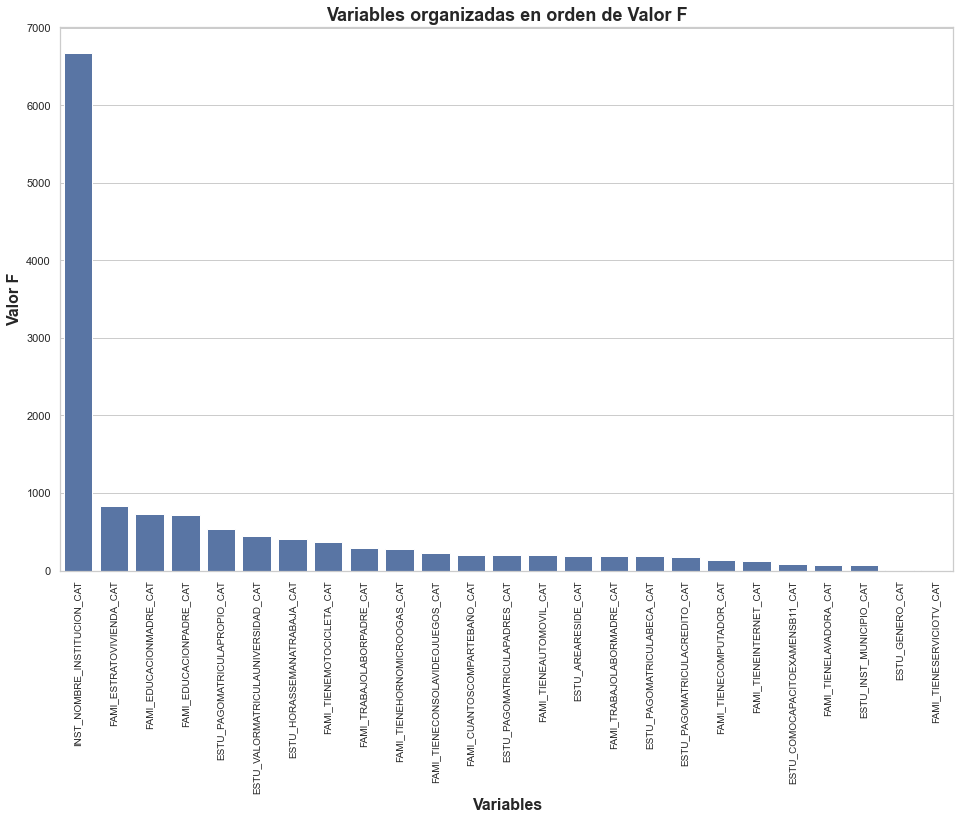

In [26]:
plt.figure(figsize=(16, 10))
sns.barplot( x = f['Caracteristicas'] , y = f['Valor F'], color = 'b')
plt.xticks(rotation='vertical', fontsize = 10)

plt.title( 'Variables organizadas en orden de Valor F', fontsize = 18 , fontweight = 'bold')
plt.xlabel('Variables', fontsize = 16, fontweight ='bold')
plt.ylabel('Valor F', fontsize = 16, fontweight = 'bold')

In [27]:
f['Spearman'] = f['Caracteristicas'].map( database.corr('spearman')['GLOBAL_PUNT'])

In [28]:
f

,Caracteristicas,Valor F,Spearman
0,INST_NOMBRE_INSTITUCION_CAT,6676.757153,0.631911
1,FAMI_ESTRATOVIVIENDA_CAT,832.173714,0.274359
2,FAMI_EDUCACIONMADRE_CAT,725.750842,0.273063
3,FAMI_EDUCACIONPADRE_CAT,710.348987,0.268232
4,ESTU_PAGOMATRICULAPROPIO_CAT,538.459396,-0.243170
5,ESTU_VALORMATRICULAUNIVERSIDAD_CAT,446.238119,0.223246
6,ESTU_HORASSEMANATRABAJA_CAT,411.203777,-0.200985
7,FAMI_TIENEMOTOCICLETA_CAT,369.584505,-0.200935
8,FAMI_TRABAJOLABORPADRE_CAT,288.510905,0.178106
9,FAMI_TIENEHORNOMICROOGAS_CAT,273.398869,0.175292


In [29]:
uni

INST_NOMBRE_INSTITUCION
FUNDACION UNIVERSITARIA NAVARRA - UNINAVARRA-NEIVA                                     127.92
CORPORACION UNIVERSITARIA REFORMADA - CUR -BARRANQUILLA                                129.00
CORPORACION POLITECNICO DE LA COSTA ATLANTICA-BARRANQUILLA                             129.60
CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -"UDI"-BUCARAMANGA             129.74
CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-NEIVA                                     130.04
UNIVERSIDAD DEL SINÚ 'Elías Bechara Zainúm' - UNISINÚ-CARTAGENA                        130.72
UNIVERSIDAD COOPERATIVA DE COLOMBIA-BARRANCABERMEJA                                    131.31
CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMFACAUCA-POPAYAN                           133.51
FUNDACION UNIVERSITARIA TECNOLOGICO COMFENALCO - CARTAGENA      -CARTAGENA             133.64
CORPORACION UNIVERSITARIA REPUBLICANA-BOGOTÁ D.C.                                      134.04
UNIVERSIDAD SIMON BOLIVAR-BARRANQUIL

Con el fin de reducir el número de variables de estudio y facilitar el análisis, se aplica una técnica de selección de características; La selección de características univariantes, esta funciona mediante la selección de las mejores características basadas en pruebas estadísticas, en este caso se tomó en cuenta el valor F y el coeficiente de correlación de Spearman, estas estiman el grado de dependencia lineal entre dos variables aleatorias. Inicialmente se genera un diagrama de barras, en el cual se puede observar una comparación entre las variables y el valor f,

Se redujeron las variables de estudio de 25 a 15. De las 15 variables seleccionadas, 14 de ellas hacen parte de características socioeconómicas del estudiante, por tanto, se crea una nueva base de datos con el nombre de "Socioeconómicas" y se procede a examinar las relaciones que guardan estas variables de estudio bajo el criterio de correlación de Spearman, como se observa en la figura 4, con el fin de verificar que no exista multicolinealidad entre las variables y encontrar información útil.

In [30]:
database = database[[       'GLOBAL_PUNT',
                            'FAMI_ESTRATOVIVIENDA_CAT',
                            'FAMI_EDUCACIONMADRE_CAT',
                            'FAMI_EDUCACIONPADRE_CAT',
                            'ESTU_PAGOMATRICULAPROPIO_CAT',
                            'ESTU_VALORMATRICULAUNIVERSIDAD_CAT',
                            'ESTU_HORASSEMANATRABAJA_CAT',
                            'FAMI_TIENEMOTOCICLETA_CAT',
                            'FAMI_TRABAJOLABORPADRE_CAT',
                            'FAMI_TRABAJOLABORMADRE_CAT',
                            'FAMI_TIENEHORNOMICROOGAS_CAT',
                            'FAMI_TIENECONSOLAVIDEOJUEGOS_CAT',
                            'FAMI_CUANTOSCOMPARTEBAÑO_CAT',
                            'ESTU_PAGOMATRICULAPADRES_CAT',
                            'FAMI_TIENEAUTOMOVIL_CAT',
                            'INST_NOMBRE_INSTITUCION_CAT']].copy()


Socioeconomicas = database[['GLOBAL_PUNT',
                            'FAMI_ESTRATOVIVIENDA_CAT',
                            'FAMI_EDUCACIONMADRE_CAT',
                            'FAMI_EDUCACIONPADRE_CAT',
                            'ESTU_PAGOMATRICULAPROPIO_CAT',
                            'ESTU_VALORMATRICULAUNIVERSIDAD_CAT',
                            'ESTU_HORASSEMANATRABAJA_CAT',
                            'FAMI_TIENEMOTOCICLETA_CAT',
                            'FAMI_TRABAJOLABORPADRE_CAT',
                            'FAMI_TRABAJOLABORMADRE_CAT',
                            'FAMI_TIENEHORNOMICROOGAS_CAT',
                            'FAMI_TIENECONSOLAVIDEOJUEGOS_CAT',
                            'FAMI_CUANTOSCOMPARTEBAÑO_CAT',
                            'ESTU_PAGOMATRICULAPADRES_CAT',
                            'FAMI_TIENEAUTOMOVIL_CAT'
                           ]].copy()

Socioeconomicas_uis = database[database['INST_NOMBRE_INSTITUCION_CAT'] == 165.76][[
                            'GLOBAL_PUNT',
                            'FAMI_ESTRATOVIVIENDA_CAT',
                            'FAMI_EDUCACIONMADRE_CAT',
                            'FAMI_EDUCACIONPADRE_CAT',
                            'ESTU_PAGOMATRICULAPROPIO_CAT',
                            'ESTU_VALORMATRICULAUNIVERSIDAD_CAT',
                            'ESTU_HORASSEMANATRABAJA_CAT',
                            'FAMI_TIENEMOTOCICLETA_CAT',
                            'FAMI_TRABAJOLABORPADRE_CAT',
                            'FAMI_TRABAJOLABORMADRE_CAT',
                            'FAMI_TIENEHORNOMICROOGAS_CAT',
                            'FAMI_TIENECONSOLAVIDEOJUEGOS_CAT',
                            'FAMI_CUANTOSCOMPARTEBAÑO_CAT',
                            'ESTU_PAGOMATRICULAPADRES_CAT',
                            'FAMI_TIENEAUTOMOVIL_CAT']].copy()

Se procede a examinar las relaciones que guardan las 15 variables de estudio bajo el criterio de correlacion de Spearman, con el fin de encontrar informacion util o interesante y verificar que no exista multicolinearidad entre las variables.

Text(0.5, 1.0, 'Correlaciones de Spearman')

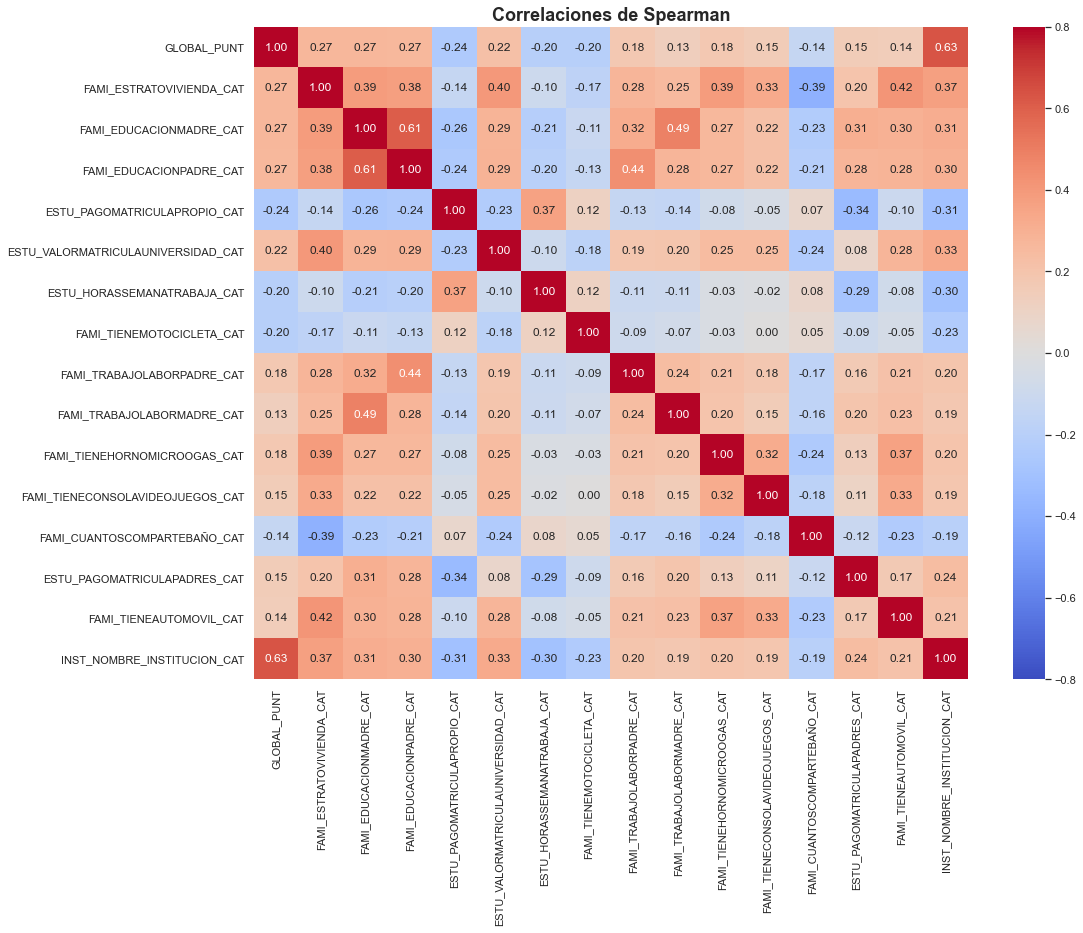

In [31]:
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(database.corr('spearman'), vmin=-.8, vmax=.8, annot= True , fmt = '.2f', cmap = 'coolwarm')
heatmap.set_title('Correlaciones de Spearman', fontsize = 18, fontweight = 'bold')

Después de analizar las correlaciones de Spearman se puede concluir que:  

- La mayor correlación que posee el puntaje global es la que guarda con la institución educativa (0,63) seguido del estrato de vivienda (0,27), existe un gran contraste entre la primera y la segunda, lo que indica que seguramente la predicción del puntaje global estará gobernada por el nombre de la institución en primera instancia. 

- Existe una correlación media entre el estrato de vivienda y la institución educativa, indicando que, en las instituciones educativas con mayor puntaje, se encuentra una mayor proporción de personas con altos estratos, lo que hace pensar que la alta correlación entre el estrato y el puntaje global sea causa de esta observación.

- Existe una correlación negativa ligera entre el puntaje global y las siguientes variables; el pago de matrícula propio, las horas que el estudiante trabaja a la semana, la posesión de motocicleta y el número de personas con las que comparte baño. De las dos primeras variables, se puede inferir que la calidad de la educación del estudiante se ve negativamente afectada por la disminución de las horas disponibles que este posee para su estudio, independiente fuera del salón de clases, sin embargo, para la tercera cabe recalcar que correlación no significa causación, y si en este caso es cuestión de causación permanece un interrogante, ¿cómo la posesión de una motocicleta afecta el desempeño académico?, y por último, la cuarta es una reflexión del estrato socioeconómico de la persona, que como vemos, guarda la segunda correlación más alta con el puntaje global.

- La posesión de motocicleta guarda una ligera correlación negativa con el estrato socioeconómico, los niveles educativos de los padres y la institución de educación superior. Pese a ser un bien económico parece que la motocicleta es un indicador de marginalidad, eso explicaría su relación con el puntaje global previamente discutido.

- El estrato socioeconómico guarda una relación moderada con el coste de la matrícula, la tenencia de electrodomésticos y automotores, como era de esperarse.

- Hay una correlación media entre el nivel de educación de la madre y la educación del padre indicando que es más probable que personas del mismo nivel educativo tengan hijos.

- El estrato socioeconómico guarda una correlación media con el nivel educativo del padre y de la madre al igual que con sus niveles de empleo, al igual que, como era de esperarse, el nivel educativo tanto del padre como de la madre guarda también una correlación con sus niveles de empleo.


Text(0.5, 1.0, 'Correlaciones de Spearman')

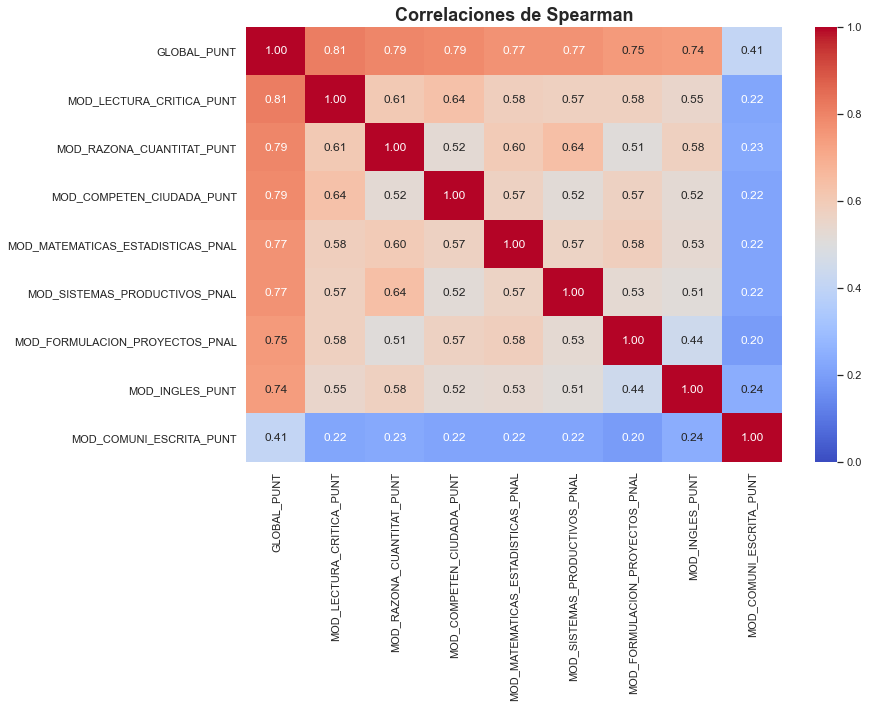

In [32]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(database2[['GLOBAL_PUNT','MOD_LECTURA_CRITICA_PUNT', 'MOD_RAZONA_CUANTITAT_PUNT','MOD_COMPETEN_CIUDADA_PUNT', 'MOD_MATEMATICAS_ESTADISTICAS_PNAL','MOD_SISTEMAS_PRODUCTIVOS_PNAL', 'MOD_FORMULACION_PROYECTOS_PNAL','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT']].corr('spearman'), vmin=0, vmax=1, annot= True , fmt = '.2f', cmap = 'coolwarm')
heatmap.set_title('Correlaciones de Spearman', fontsize = 18, fontweight = 'bold')

De la figura anterior se puede concluir que:

- El puntaje global guarda una fuerte relación con las competencias evaluadas (superior a 0,74), es decir, conociendo únicamente un puntaje en estas áreas se puede realizar un estimado del puntaje global sin estar tan alejado de la realidad, a excepción del módulo de comunicación escrita ( correlación de 0,41), cabe recalcar que esta competencia es la única cuya calificación es realizada por una persona que se basa en algunos criterios para cuantificar la calidad del texto, se podría asegurar que existe un mayor grado de subjetividad en esta calificación.

- La competencia de comunicación escrita es la que menor guarda relación con las demás competencias.

- El módulo de lectura crítica es la competencia que mayor relación guarda con el puntaje global y a su vez, guarda una relación significativa con las competencias ciudadanas, esto resalta la importancia de un buen nivel de lectura para obtener buenos resultados en las pruebas.

- Con el fin de observar la evolución de la distribución de los puntajes por universidades, en la figura 6, se genera una gráfica de cajas cuyos valores en el eje horizontal son todas las instituciones educativas y en el eje vertical se presentan los valores del puntaje global. 


[Text(0, 0, 'FUNDACION UNIVERSITARIA NAVARRA - UNINAVARRA-NEIVA'),
 Text(1, 0, 'CORPORACION UNIVERSITARIA REFORMADA - CUR -BARRANQUILLA'),
 Text(2, 0, 'CORPORACION POLITECNICO DE LA COSTA ATLANTICA-BARRANQUILLA'),
 Text(3, 0, 'CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -"UDI"-BUCARAMANGA'),
 Text(4, 0, 'CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-NEIVA'),
 Text(5, 0, "UNIVERSIDAD DEL SINÚ 'Elías Bechara Zainúm' - UNISINÚ-CARTAGENA"),
 Text(6, 0, 'UNIVERSIDAD COOPERATIVA DE COLOMBIA-BARRANCABERMEJA'),
 Text(7, 0, 'CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMFACAUCA-POPAYAN'),
 Text(8, 0, 'FUNDACION UNIVERSITARIA TECNOLOGICO COMFENALCO - CARTAGENA      -CARTAGENA'),
 Text(9, 0, 'CORPORACION UNIVERSITARIA REPUBLICANA-BOGOTÁ D.C.'),
 Text(10, 0, 'UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA'),
 Text(11, 0, 'INSTITUCION UNIVERSITARIA ANTONIO JOSE CAMACHO - UNIAJC-CALI'),
 Text(12, 0, 'FUNDACION UNIVERSITARIA DE POPAYAN-POPAYAN'),
 Text(13, 0, 'INSTITUCION  UNIVERSITARIA PASCUAL BRA

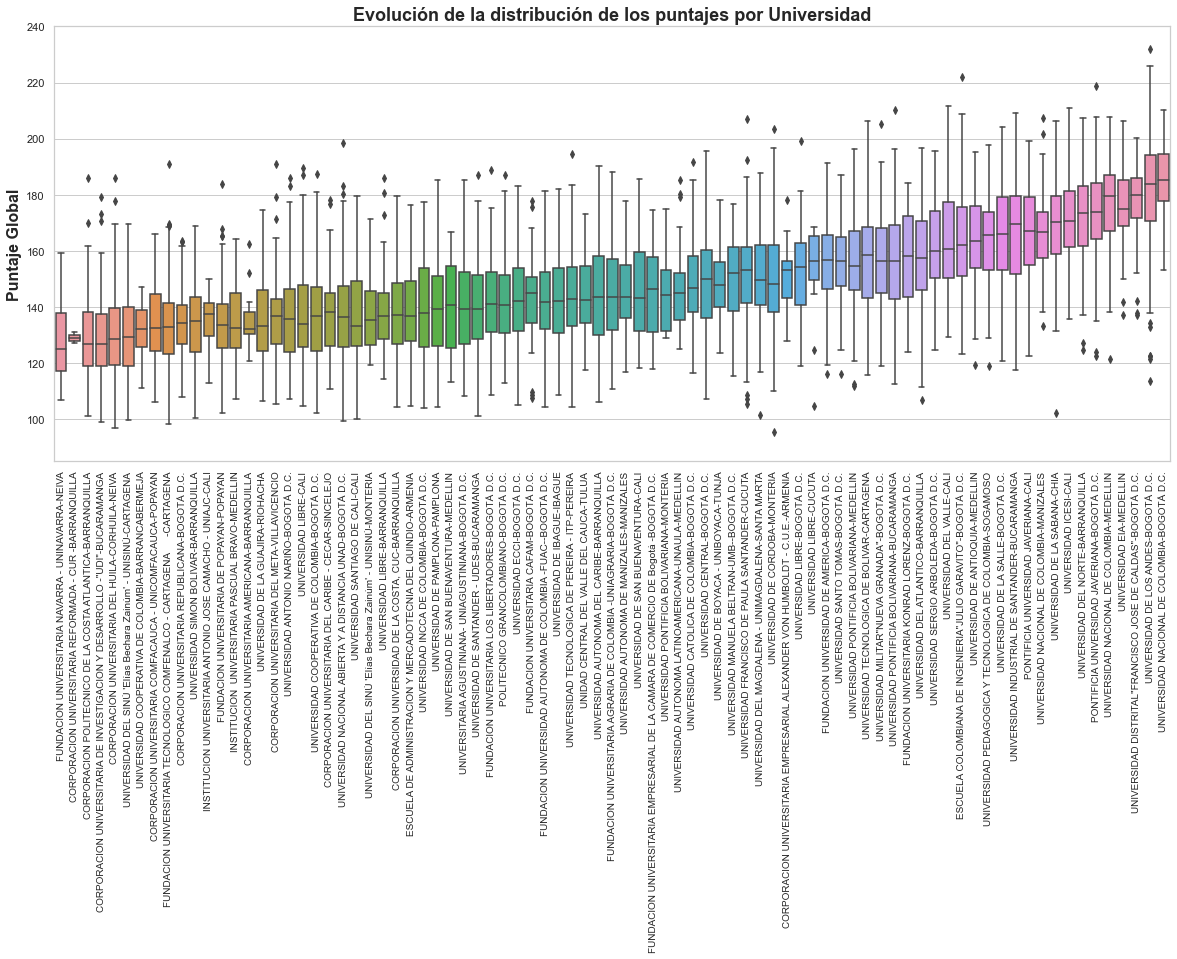

In [33]:
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x= 'INST_NOMBRE_INSTITUCION_CAT' , y='GLOBAL_PUNT', data=database)
fig.axis(ymin=85, ymax=240)
plt.xticks( rotation= 90)

plt.title( 'Evolución de la distribución de los puntajes por Universidad', fontsize = 18 , fontweight = 'bold')
plt.ylabel('Puntaje Global', fontsize = 16, fontweight = 'bold')
plt.xlabel('')
ax.set_xticklabels(uni.keys(), fontsize = 10)

Como era de esperarse, las universidades con mejor desempeño en las pruebas Icfes Saber Pro, son las consideradas “elites” que dominan los rankings de calificaciones de universidades en Colombia, vemos la lista liderada por universidades como la Nacional, los Andes, la Distrital, la EIA y la Javeriana. Lo que cabe recalcar es la diferencia abismal y clara que existe entre el desempeño en las instituciones, con las mejores universidades con una mediana superior a 180 y las peores con una mediana que ronda a 125, teniendo en cuenta que la distribución de los puntajes tiene una desviación estándar de 21.85, es una diferencia de alrededor 2.5 desviaciones estándar.

Se grafica la distribución de las variables categóricas del estudiantado en general, para obtener la distribución univariada de cada atributo.

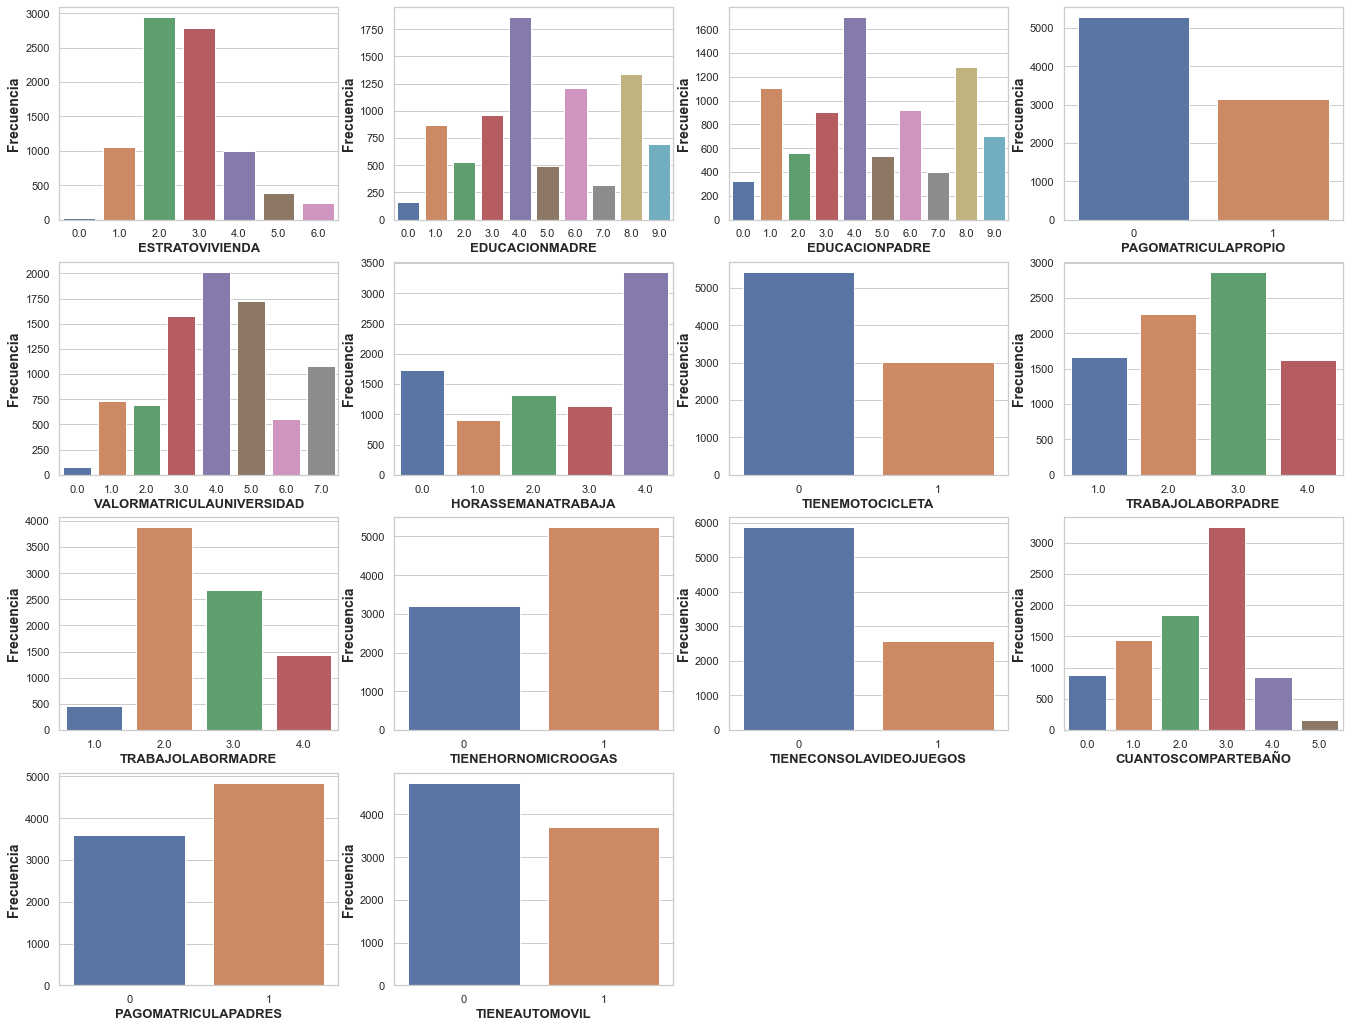

In [34]:
plt.figure(figsize=(23,18))
for i, col in enumerate(Socioeconomicas.columns.drop('GLOBAL_PUNT')) :
    plt.subplot(4,4,i+1)
    sns.countplot( x= col, data = Socioeconomicas)
    plt.ylabel('Frecuencia', fontsize = 14, fontweight = 'bold')
    plt.xlabel(f'{col.split("_")[1]}', fontsize = 13, fontweight = 'bold')

De la figura anterior, se puede deducir que:

- La mayoría de los estudiantes se encuentran en el estrato 2 y 3, y son muy pocos los que hacen parte del estrato 0, estos datos del estrato 0 dicen muy poco y agregan complejidad al análisis, por tal razón, se decide eliminarlos.

- El nivel más común de educación, tanto para los padres y las madres, es la secundaria completa, seguido de una carrera profesional, las mujeres parecen tener mejores niveles educativos en promedio.

- La mayoría de los estudiantes no pagan su propia matrícula y la mayoría de las matrículas se encuentran en el intervalo de 2.5 a 4 millones, seguido del intervalo de 4 a 5.5 millones, cabe recalcar que hay un número significativo de personas que paga una matrícula 7 millones.

- La mayor parte de los estudiantes trabaja más de 30h a la semana, muy por encima de los demás rubros, es seguido por el intervalo que no trabaja.

- Los padres de los estudiantes se encuentran en trabajos de mayor nivel en comparación con las madres, incluso teniendo en cuenta que las madres tienen ligeramente una mejor educación.

- La mayor parte de los estudiantes comparten baño con 3 a 4 personas, seguido por el intervalo de compartir baño con 2 personas.

- En su mayoría los estudiantes no poseen ni moto, ni carro y tampoco consola de videojuegos. Pero si cuentan con un horno microondas.


In [35]:
Socioeconomicas.drop(Socioeconomicas[Socioeconomicas['FAMI_ESTRATOVIVIENDA_CAT'] == 0].index, axis = 0, inplace = True)
database2.drop(database2[database2['FAMI_ESTRATOVIVIENDA_CAT'] == 0].index, axis = 0, inplace = True)
database.drop(database[database['FAMI_ESTRATOVIVIENDA_CAT'] == 0].index, axis = 0, inplace = True)

## Mineria de datos

### Analisis sobre las Instituciones de Educacion Superior

Despues de observar la importancia que tiene la universidad sobre el puntaje global, se procede a aplicar una tecnica de aprendizaje no supervisado llamada clustering, que busca agrupar las universidades con rendimientos similares teniendo en cuenta todas las competencias evaluadas por el icfes. 

Inicialmente se agrupa en forma de tabla los datos de los nombres de cada una de las instituciones evaluadas y cada uno de los módulos evaluados en la prueba, en filas y columnas respectivamente, con el fin de mostrar la puntuación media obtenida por cada institución en cada módulo evaluado.

El algoritmo de clustering usado fue KMeans, de la libreria Scikit-Learn. Para determinar el numero de clusters optimo se uso el metodo del codo, que consiste en seleccionar el punto en el que la pendiente de la grafica de inercia vs numero de clusters comienza a tornarse horizontal. En este caso en concreto, el codo se encuentra al analizar 4 clusters.


In [36]:
cl_univer = database2.groupby('INST_NOMBRE_INSTITUCION').agg('mean')[['MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT',
'MOD_INGLES_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_SISTEMAS_PRODUCTIVOS_PNAL', 'MOD_FORMULACION_PROYECTOS_PNAL',
'MOD_MATEMATICAS_ESTADISTICAS_PNAL']]
cl_univer

,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_SISTEMAS_PRODUCTIVOS_PNAL,MOD_FORMULACION_PROYECTOS_PNAL,MOD_MATEMATICAS_ESTADISTICAS_PNAL
INST_NOMBRE_INSTITUCION,,,,,,,,
CORPORACION POLITECNICO DE LA COSTA ATLANTICA-BARRANQUILLA,139.923913,126.608696,122.750000,138.673913,145.119565,123.630435,126.021739,114.108696
"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA",151.978142,141.322404,130.185792,150.530055,144.142077,133.027322,136.748634,119.803279
CORPORACION UNIVERSITARIA AMERICANA-BARRANQUILLA,144.368421,142.578947,130.000000,137.210526,135.105263,132.736842,139.631579,117.631579
CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMFACAUCA-POPAYAN,144.804348,132.804348,122.239130,136.869565,145.043478,128.065217,137.891304,120.347826
"CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -""UDI""-BUCARAMANGA",139.350000,128.450000,122.750000,143.216667,143.383333,125.983333,121.383333,113.433333
CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SINCELEJO,148.558824,135.514706,126.411765,146.000000,146.014706,132.352941,141.485294,121.647059
CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-NEIVA,143.017123,128.065068,120.113014,139.325342,140.835616,124.746575,129.726027,114.253425
CORPORACION UNIVERSITARIA DEL META-VILLAVICENCIO,149.895349,136.593023,131.244186,139.325581,142.790698,131.500000,138.790698,120.825581
CORPORACION UNIVERSITARIA EMPRESARIAL ALEXANDER VON HUMBOLDT - C.U.E.-ARMENIA,170.750000,149.062500,142.250000,164.875000,152.687500,153.000000,153.312500,130.000000


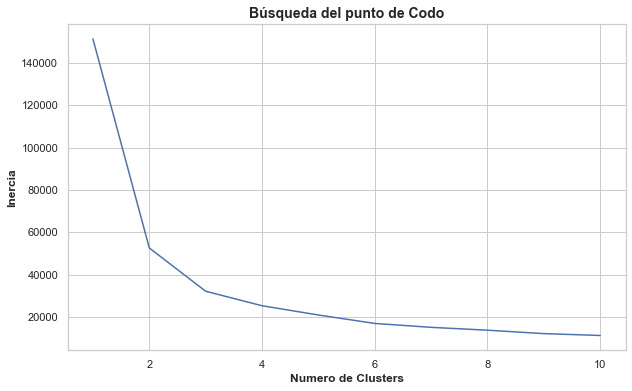

In [37]:
X = cl_univer

from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Búsqueda del punto de Codo', fontsize = 14, fontweight ='bold')
ax.set_xlabel('Numero de Clusters', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Inercia', fontsize = 12, fontweight = 'bold')


plt.show()

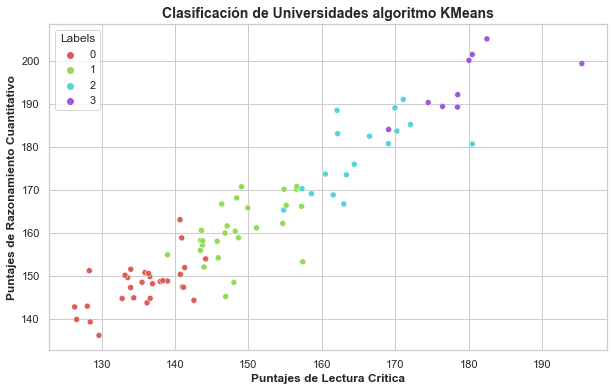

In [38]:
# 4 cluster
km4 = KMeans(n_clusters=4, random_state = 50).fit(X)

X['Labels'] = km4.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(y = X['MOD_RAZONA_CUANTITAT_PUNT'], x = X['MOD_LECTURA_CRITICA_PUNT'], data = X , hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('Clasificación de Universidades algoritmo KMeans', fontsize = 14, fontweight ='bold')
plt.xlabel('Puntajes de Lectura Critica', fontsize = 12, fontweight ='bold')
plt.ylabel('Puntajes de Razonamiento Cuantitativo', fontsize = 12, fontweight ='bold')
plt.show()

In [39]:
uni_dict = {'Cluster 0': X[X['Labels'] == 0].index.to_list(), 
            'Cluster 1': X[X['Labels'] == 1].index.to_list(),
            'Cluster 2': X[X['Labels'] == 2].index.to_list(),
            'Cluster 3': X[X['Labels'] == 3].index.to_list()}


clasif = pd.DataFrame.from_dict(uni_dict, orient = 'index').transpose()
clasif

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,CORPORACION POLITECNICO DE LA COSTA ATLANTICA-BARRANQUILLA,CORPORACION UNIVERSITARIA EMPRESARIAL ALEXANDER VON HUMBOLDT - C.U.E.-ARMENIA,"ESCUELA COLOMBIANA DE INGENIERIA""JULIO GARAVITO""-BOGOTÁ D.C.",PONTIFICIA UNIVERSIDAD JAVERIANA-BOGOTÁ D.C.
1,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA",FUNDACION UNIVERSIDAD AUTONOMA DE COLOMBIA -FUAC--BOGOTÁ D.C.,FUNDACION UNIVERSIDAD DE AMERICA-BOGOTÁ D.C.,UNIVERSIDAD DE LA SABANA-CHIA
2,CORPORACION UNIVERSITARIA AMERICANA-BARRANQUILLA,FUNDACION UNIVERSITARIA AGRARIA DE COLOMBIA -UNIAGRARIA-BOGOTÁ D.C.,FUNDACION UNIVERSITARIA KONRAD LORENZ-BOGOTÁ D.C.,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.
3,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMFACAUCA-POPAYAN,FUNDACION UNIVERSITARIA CAFAM-BOGOTÁ D.C.,PONTIFICIA UNIVERSIDAD JAVERIANA-CALI,UNIVERSIDAD DEL NORTE-BARRANQUILLA
4,"CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -""UDI""-BUCARAMANGA",FUNDACION UNIVERSITARIA EMPRESARIAL DE LA CAMARA DE COMERCIO DE Bogotá -BOGOTÁ D.C.,UNIVERSIDAD DE ANTIOQUIA-MEDELLIN,"UNIVERSIDAD DISTRITAL""FRANCISCO JOSE DE CALDAS""-BOGOTÁ D.C."
5,CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SINCELEJO,FUNDACION UNIVERSITARIA LOS LIBERTADORES-BOGOTÁ D.C.,UNIVERSIDAD DE LA SALLE-BOGOTÁ D.C.,UNIVERSIDAD EIA-MEDELLIN
6,CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-NEIVA,POLITECNICO GRANCOLOMBIANO-BOGOTÁ D.C.,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,UNIVERSIDAD ICESI-CALI
7,CORPORACION UNIVERSITARIA DEL META-VILLAVICENCIO,UNIDAD CENTRAL DEL VALLE DEL CAUCA-TULUA,UNIVERSIDAD DEL VALLE-CALI,UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOTÁ D.C.
8,CORPORACION UNIVERSITARIA REFORMADA - CUR -BARRANQUILLA,UNIVERSIDAD AUTONOMA DE MANIZALES-MANIZALES,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,UNIVERSIDAD NACIONAL DE COLOMBIA-MEDELLIN
9,CORPORACION UNIVERSITARIA REPUBLICANA-BOGOTÁ D.C.,UNIVERSIDAD AUTONOMA DEL CARIBE-BARRANQUILLA,"UNIVERSIDAD MILITAR""NUEVA GRANADA""-BOGOTÁ D.C.",None


In [40]:
uni_score = pd.DataFrame( {'Cluster 0': X[X['Labels'] == 0].mean().round(2), 
                           'Cluster 1': X[X['Labels'] == 1].mean().round(2),
                           'Cluster 2': X[X['Labels'] == 2].mean().round(2),
                           'Cluster 3': X[X['Labels'] == 3].mean().round(2)} )

uni_score.drop('Labels', axis = 0, inplace = True)

uni_score

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
MOD_RAZONA_CUANTITAT_PUNT,148.07,160.62,178.13,194.59
MOD_LECTURA_CRITICA_PUNT,135.71,148.73,165.13,179.50
MOD_COMPETEN_CIUDADA_PUNT,127.32,143.12,157.20,173.05
MOD_INGLES_PUNT,144.81,157.14,173.34,196.31
MOD_COMUNI_ESCRITA_PUNT,143.32,147.40,153.99,163.67
MOD_SISTEMAS_PRODUCTIVOS_PNAL,128.31,138.97,156.54,174.95
MOD_FORMULACION_PROYECTOS_PNAL,133.36,146.25,158.59,169.13
MOD_MATEMATICAS_ESTADISTICAS_PNAL,118.91,127.24,141.95,156.82


Claramente se pueden apreciar las diferencias en las medias por competencias para los diferentes grupos de universidades.

La siguiente lista contiene a las universidades clasificadas como "Categoria 3" por el algoritmo, 6 de estas 9 universidades son privadas, los nombres de estas instituciones generalmente lideran los rankings internacionales.

In [41]:
X[X['Labels'] == 3].index.to_list()

['PONTIFICIA UNIVERSIDAD JAVERIANA-BOGOTÁ D.C.',
 'UNIVERSIDAD DE LA SABANA-CHIA',
 'UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.',
 'UNIVERSIDAD DEL NORTE-BARRANQUILLA',
 'UNIVERSIDAD DISTRITAL"FRANCISCO JOSE DE CALDAS"-BOGOTÁ D.C.',
 'UNIVERSIDAD EIA-MEDELLIN',
 'UNIVERSIDAD ICESI-CALI',
 'UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOTÁ D.C.',
 'UNIVERSIDAD NACIONAL DE COLOMBIA-MEDELLIN']

La UIS se encuentra en la "Categoria dos" de las instituciones de educacion superior, sin embargo es una de las que tiene mejor rendimiento dentro de este grupo. 

In [42]:
X[X['Labels'] == 2].index.to_list()

['ESCUELA COLOMBIANA DE INGENIERIA"JULIO GARAVITO"-BOGOTÁ D.C.',
 'FUNDACION UNIVERSIDAD DE AMERICA-BOGOTÁ D.C.',
 'FUNDACION UNIVERSITARIA KONRAD LORENZ-BOGOTÁ D.C.',
 'PONTIFICIA UNIVERSIDAD JAVERIANA-CALI',
 'UNIVERSIDAD DE ANTIOQUIA-MEDELLIN',
 'UNIVERSIDAD DE LA SALLE-BOGOTÁ D.C.',
 'UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA',
 'UNIVERSIDAD DEL VALLE-CALI',
 'UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA',
 'UNIVERSIDAD MILITAR"NUEVA GRANADA"-BOGOTÁ D.C.',
 'UNIVERSIDAD NACIONAL DE COLOMBIA-MANIZALES',
 'UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMBIA-SOGAMOSO',
 'UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA',
 'UNIVERSIDAD PONTIFICIA BOLIVARIANA-MEDELLIN',
 'UNIVERSIDAD SANTO TOMAS-BOGOTÁ D.C.',
 'UNIVERSIDAD SERGIO ARBOLEDA-BOGOTÁ D.C.',
 'UNIVERSIDAD TECNOLOGICA DE BOLIVAR-CARTAGENA']

La siguiente lista nombra los instituciones de "Categoria 1", se encuentran los nombres de universidades con menor trayectoria y la mayoria de las fundaciones universitarias.

In [43]:
X[X['Labels'] == 1].index.to_list()

['CORPORACION UNIVERSITARIA EMPRESARIAL ALEXANDER VON HUMBOLDT - C.U.E.-ARMENIA',
 'FUNDACION UNIVERSIDAD AUTONOMA DE COLOMBIA -FUAC--BOGOTÁ D.C.',
 'FUNDACION UNIVERSITARIA AGRARIA DE COLOMBIA -UNIAGRARIA-BOGOTÁ D.C.',
 'FUNDACION UNIVERSITARIA CAFAM-BOGOTÁ D.C.',
 'FUNDACION UNIVERSITARIA EMPRESARIAL DE LA CAMARA DE COMERCIO DE Bogotá -BOGOTÁ D.C.',
 'FUNDACION UNIVERSITARIA LOS LIBERTADORES-BOGOTÁ D.C.',
 'POLITECNICO GRANCOLOMBIANO-BOGOTÁ D.C.',
 'UNIDAD CENTRAL DEL VALLE DEL CAUCA-TULUA',
 'UNIVERSIDAD AUTONOMA DE MANIZALES-MANIZALES',
 'UNIVERSIDAD AUTONOMA DEL CARIBE-BARRANQUILLA',
 'UNIVERSIDAD AUTONOMA LATINOAMERICANA-UNAULA-MEDELLIN',
 'UNIVERSIDAD CATOLICA DE COLOMBIA-BOGOTÁ D.C.',
 'UNIVERSIDAD CENTRAL-BOGOTÁ D.C.',
 'UNIVERSIDAD DE BOYACA - UNIBOYACA-TUNJA',
 'UNIVERSIDAD DE CORDOBA-MONTERIA',
 'UNIVERSIDAD DE IBAGUE-IBAGUE',
 'UNIVERSIDAD DE SAN BUENAVENTURA-CALI',
 'UNIVERSIDAD DE SANTANDER - UDES-BUCARAMANGA',
 'UNIVERSIDAD DEL MAGDALENA - UNIMAGDALENA-SANTA MARTA',
 'U

Y por ultimo las instituciones de educacion superior de "Categoria 0", la lista esta conformada por corporaciones, fundaciones e instituciones universitarias, junto con las sedes de universidades en ciudades pequeñas.

In [44]:
X[X['Labels'] == 0].index.to_list()

['CORPORACION POLITECNICO DE LA COSTA ATLANTICA-BARRANQUILLA',
 'CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA',
 'CORPORACION UNIVERSITARIA AMERICANA-BARRANQUILLA',
 'CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMFACAUCA-POPAYAN',
 'CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -"UDI"-BUCARAMANGA',
 'CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SINCELEJO',
 'CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-NEIVA',
 'CORPORACION UNIVERSITARIA DEL META-VILLAVICENCIO',
 'CORPORACION UNIVERSITARIA REFORMADA - CUR -BARRANQUILLA',
 'CORPORACION UNIVERSITARIA REPUBLICANA-BOGOTÁ D.C.',
 'ESCUELA DE ADMINISTRACION Y MERCADOTECNIA DEL QUINDIO-ARMENIA',
 'FUNDACION UNIVERSITARIA DE POPAYAN-POPAYAN',
 'FUNDACION UNIVERSITARIA NAVARRA - UNINAVARRA-NEIVA',
 'FUNDACION UNIVERSITARIA TECNOLOGICO COMFENALCO - CARTAGENA      -CARTAGENA',
 'INSTITUCION  UNIVERSITARIA PASCUAL BRAVO-MEDELLIN',
 'INSTITUCION UNIVERSITARIA ANTONIO JOSE CAMACHO - UNIAJC-CALI',
 'UNIVERSIDAD ANTONIO NARIÑO-BOGOTÁ

In [45]:
Universidades = X.copy()

In [46]:
database2['UNI_GRUPO'] = database2['INST_NOMBRE_INSTITUCION'].map(dict(zip ( X.index , X['Labels'])))

En la siguiente tabla se observa el porcentaje de los estratos que conforman cada uno de los grupos de las IES.

In [47]:
pd.crosstab( database2['UNI_GRUPO'] , database2['FAMI_ESTRATOVIVIENDA_CAT'], normalize = 'index').round(4)*100

FAMI_ESTRATOVIVIENDA_CAT,1.0,2.0,3.0,4.0,5.0,6.0
UNI_GRUPO,,,,,,
0,20.20,44.13,28.68,5.49,1.27,0.22
1,9.44,36.84,41.06,9.48,2.59,0.58
2,8.57,29.15,35.75,18.56,5.65,2.32
3,3.68,13.81,24.48,24.84,17.22,15.96


Si observamos detalladamente, los estratos de vivienda aumentan junto con la categoría de la universidad. El grupo 3 de las IES tiene mayores proporciones de estudiantes estratos 4, 5 y 6, la diferencia contrasta especialmente para el estrato 6, que está conformado en menor manera por estratos inferiores al 3. El grupo 0 está dominado por estudiantes de los estratos 1 , 2 y 3. El grupo 1 y 2 están conformados principalmente por estratos 2 y 3, sin embargo, el grupo 2 tiene una mayor proporción de estudiantes estrato 4. Estos resultados son conformes con el coeficiente de correlación de Pearson previamente calculado, donde se encuentra una correlación media entre el estrato y la institución educativa.

Con el fin de observar la influencia del estrato sobre el puntaje global, se genera una gráfica de cajas cuyos valores en el eje horizontal son los grupos (clústeres) asignados para las diferentes IES, en el eje vertical se presentan los valores del puntaje global y se separan en cajas respecto al estrato de vivienda. Se realiza el mismo procedimiento de la tabla y su respectiva gráfica para las variables 'FAMI_EDUCACIONMADRE_CAT', 'FAMI_EDUCACIONPADRE_CAT',
'ESTU_VALORMATRICULAUNIVERSIDAD_CAT'.


Text(0, 0.5, 'Puntaje Global')

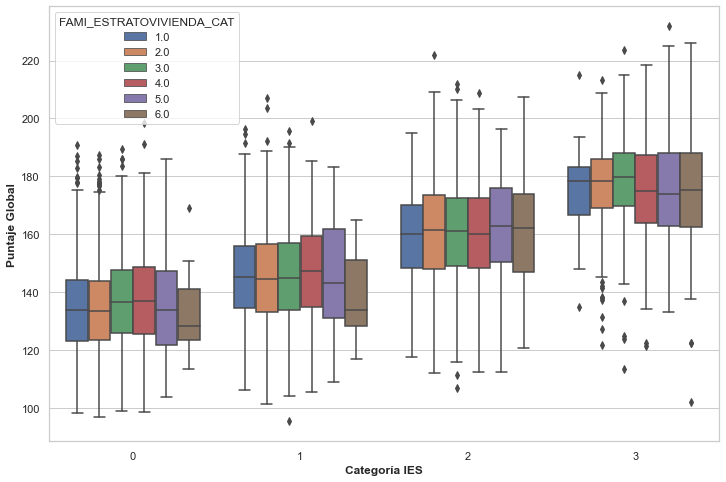

In [48]:
f8, ax8 = plt.subplots(figsize=(12, 8))
sns.boxplot(x='UNI_GRUPO', y='GLOBAL_PUNT', data= database2, hue = 'FAMI_ESTRATOVIVIENDA_CAT' )
plt.xlabel('Categoría IES', fontsize = 12, fontweight ='bold')
plt.ylabel('Puntaje Global', fontsize = 12, fontweight = 'bold')

No se aprecia una influencia clara del estrato de un estudiante sobre su puntaje global. Como previamente se menciono, la influencia de la IES es clara, el puntaje aumenta conforme se avanza en el grupo de las IES.

In [49]:
pd.crosstab( database2['UNI_GRUPO'] , database2['FAMI_EDUCACIONMADRE_CAT'], normalize = 'index').round(4)*100

FAMI_EDUCACIONMADRE_CAT,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
UNI_GRUPO,,,,,,,,,,
0,2.70,14.43,8.29,14.21,24.24,6.33,14.03,2.76,9.28,3.72
1,2.21,11.45,7.48,12.74,23.98,5.81,14.54,3.26,12.66,5.89
2,0.83,5.71,3.81,8.98,21.95,5.83,16.72,5.41,20.40,10.35
3,0.45,2.69,1.79,3.86,12.11,4.48,11.30,5.20,35.16,22.96


Al observar la tabla anterior, se puede encontrar que conforme ascendemos en el grupo de IES, aumentan los niveles educativos de las madres de los estudiantes, llegando hasta 35% de madres profesionales y un 23% de madres con postgrado para el grupo 3 de las instituciones educativas, al igual que en la tabla de los estratos las diferencias no son amplias para los grupos 1 y 2.

Text(0, 0.5, 'Puntaje Global')

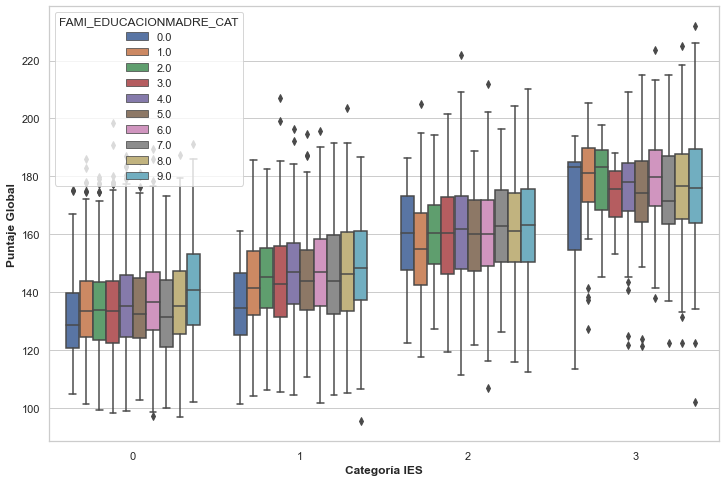

In [50]:
f8, ax8 = plt.subplots(figsize=(12, 8))
sns.boxplot(x='UNI_GRUPO', y='GLOBAL_PUNT', data= database2, hue = 'FAMI_EDUCACIONMADRE_CAT' )
plt.xlabel('Categoría IES', fontsize = 12, fontweight ='bold')
plt.ylabel('Puntaje Global', fontsize = 12, fontweight = 'bold')

Se observa una tendencia leve a la alza en los puntajes conforme se aumenta en el nivel educativo de la madre, sin embargo esta tendencia es menos clara conforme ascendemos en el grupo de las instituciones educativas, hasta que en el tercer grupo se hace insistinguible, la influencia del grupo educativo ya fue previamente descrita.

In [51]:
pd.crosstab( database2['UNI_GRUPO'] , database2['FAMI_EDUCACIONPADRE_CAT'], normalize = 'index').round(4)*100

FAMI_EDUCACIONPADRE_CAT,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
UNI_GRUPO,,,,,,,,,,
0,4.35,18.16,8.47,12.57,22.35,6.52,11.14,3.85,9.47,3.13
1,4.30,13.95,7.39,12.28,21.93,7.10,11.32,4.47,12.16,5.10
2,3.03,8.39,5.47,9.10,19.69,6.07,13.03,6.13,18.98,10.11
3,1.97,3.86,1.43,4.66,11.12,4.84,6.19,5.83,32.47,27.62


Text(0, 0.5, 'Puntaje Global')

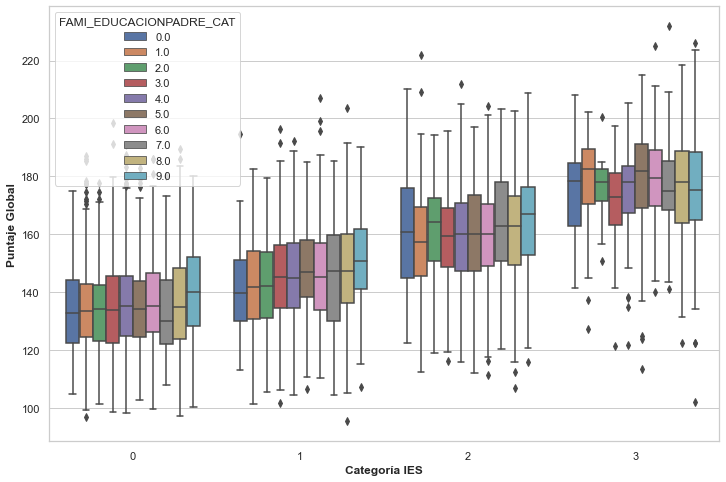

In [52]:
f8, ax8 = plt.subplots(figsize=(12, 8))
sns.boxplot(x='UNI_GRUPO', y='GLOBAL_PUNT', data= database2, hue = 'FAMI_EDUCACIONPADRE_CAT' )
plt.xlabel('Categoría IES', fontsize = 12, fontweight ='bold')
plt.ylabel('Puntaje Global', fontsize = 12, fontweight = 'bold')

Para los niveles educativos de los padres, se observan las mismas tendencias y se realizan las mismas observaciones que para el nivel educativo de las madres, los comportanmientos se replican.

In [53]:
pd.crosstab( database2['UNI_GRUPO'] , database2['ESTU_VALORMATRICULAUNIVERSIDAD_CAT'], normalize = 'index').round(4)*100

ESTU_VALORMATRICULAUNIVERSIDAD_CAT,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
UNI_GRUPO,,,,,,,,
0,0.40,1.43,10.58,39.48,34.79,12.26,0.93,0.12
1,0.25,6.98,9.57,6.56,31.79,37.43,7.35,0.08
2,2.26,22.84,5.41,5.12,7.26,24.99,18.08,14.04
3,1.70,11.39,2.78,4.66,0.27,0.72,3.59,74.89


La anterior tabla brinda informacion interesante: 
El grupo 3 de IES esta en su gran mayoria compuesto por estudiantes cuyas matriculas superan los 7 millones de pesos (75%), un numero significativo teniendo en cuenta que 3 de las 9 universidades en este grupo son publicas, el 11% siguiente en este grupo son estudiantes que pagan un monto menor a 500 mil pesos, posiblemente estudiantes con becas o de universidades publicas. 
El grupo 2 de IES esta conformado por dos tipos de estudiantes, los que pagan matriculas muy bajas (23% paga por debajo de 500 mil), y otro grupo que paga matriculas por encima de los 4 millones (57%), el primer rubro son estudiantes con becas o de instituciones publicas con bajos ingresos. Para los grupos 0 y 1 se observa que los datos se congregan alrededor de los valores medios de matricula (entre 1 millon y 4 millones), el grupo cero especialmente alrededor del millon de pesos y el grupo 1 alrededor de los 4 millones. En resumen; en el grupo 3 de las IES las matriculas se ubican generalmente por encima de los 7 millones, para el grupo 2 se forman dos nichos, uno que paga muy poco dinero y otro que paga matriculas alrededor de los 5 millones, en grupo 1 las matriculas estan alrededor de los 4 millones, y en el grupo 0 alrededor del millon de pesos.

Text(0, 0.5, 'Puntaje Global')

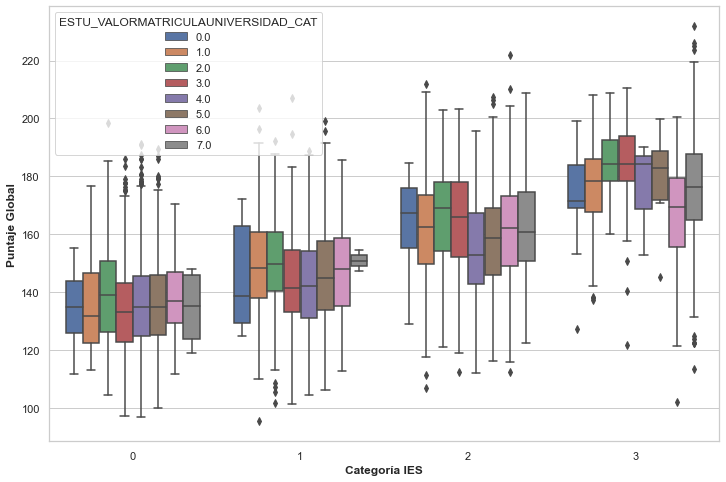

In [54]:
f8, ax8 = plt.subplots(figsize=(12, 8))
sns.boxplot(x='UNI_GRUPO', y='GLOBAL_PUNT', data= database2, hue = 'ESTU_VALORMATRICULAUNIVERSIDAD_CAT' )
plt.xlabel('Categoría IES', fontsize = 12, fontweight ='bold')
plt.ylabel('Puntaje Global', fontsize = 12, fontweight = 'bold')

No se aprecia una influencia clara del coste de la matricula sobre su puntaje global, se obtienen rendimientos similares dentro del mismo grupo de IES.

Con el fin de evaluar la significancia estadistica de las variables previamente analizadas, se realizan un analisis anova.

In [55]:
formula = 'GLOBAL_PUNT ~ C(UNI_GRUPO) + C(FAMI_ESTRATOVIVIENDA_CAT) + C(ESTU_VALORMATRICULAUNIVERSIDAD_CAT) + C(FAMI_EDUCACIONMADRE_CAT) + C(FAMI_EDUCACIONPADRE_CAT)'
model = ols( formula , data=database2).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(UNI_GRUPO),3.0,1.659588e+06,553195.879119,2013.425842,0.000000e+00
C(FAMI_ESTRATOVIVIENDA_CAT),5.0,4.784199e+03,956.839861,3.482539,3.804098e-03
C(ESTU_VALORMATRICULAUNIVERSIDAD_CAT),7.0,3.006743e+04,4295.347449,15.633456,1.661671e-20
C(FAMI_EDUCACIONMADRE_CAT),9.0,1.660289e+04,1844.765340,6.714255,1.207068e-09
C(FAMI_EDUCACIONPADRE_CAT),9.0,6.289490e+03,698.832181,2.543487,6.495638e-03
Residual,8378.0,2.301885e+06,274.753541,NaN,NaN


A pesar de no notar diferencias drasticas en las graficas para algunas variables, segun el analisis ANOVA, todas son estadisticamente significativas con un 1% de significancia.

In [56]:
X = Socioeconomicas.drop(columns = 'GLOBAL_PUNT')

Con el fin de crear los perfiles tipologicos de los estudiates de ingenieria industrial, se realiza una clasificacion de los mismos por medio de sus variables socioeconomicas, usando aprendizaje no supervisado, al igual que en el caso de las universidades se donde se realizo una agrupacion clustering.

El algoritmo de clustering usado fue KModes, de la libreria KModes, debido a la naturaleza categorica de las variables. Para determinar el numero de clusters optimo se uso el metodo del codo, que consiste en seleccionar el punto en el que la pendiente de la grafica de inercia vs numero de clusters comienza a tornarse horizontal. En este caso en concreto, el codo se encuentra entre el 3 y 5 clusters, se opta por el numero 3.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 64654.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1045, cost: 59086.0
Run 1, iteration: 2/100, moves: 1134, cost: 57866.0
Run 1, iteration: 3/100, moves: 271, cost: 57866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1810, cost: 53197.0
Run 1, iteration: 2/100, moves: 273, cost: 53197.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1994, cost: 51497.0
Run 1, iteration: 2/100, moves: 619, cost: 51421.0
Run 1, iteration: 3/100, moves: 14, cost: 51421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2076, cost: 50147.0
Run 1, iteration: 2/100, moves: 983, cost: 49694.0
Run 1, iteration: 3/100, moves: 17, c

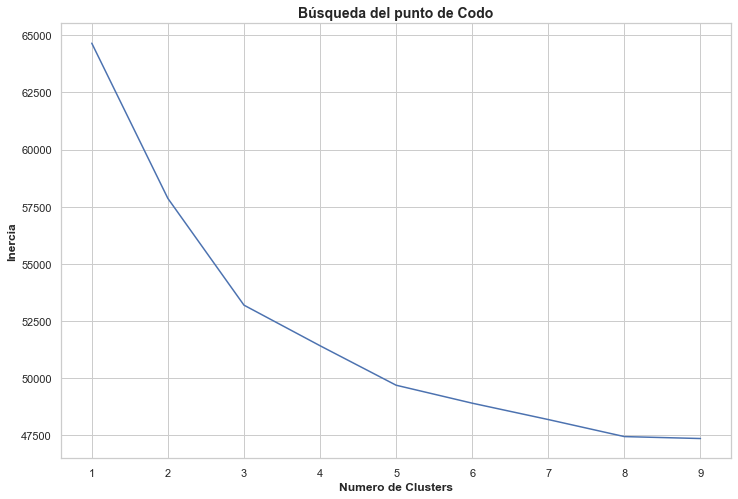

In [57]:
from kmodes.kmodes import KModes

clusters = []

for i in range(1, 10):
    km = KModes(n_clusters=i, init = 'Cao', n_init = 1, verbose = 1).fit(X)
    clusters.append(km.cost_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Búsqueda del punto de Codo', fontsize = 14, fontweight ='bold')
ax.set_xlabel('Numero de Clusters', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Inercia', fontsize = 12, fontweight = 'bold')


plt.show()

In [58]:
# 3 cluster
km = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
cluster_labels = km.fit_predict(X)
all_features = X.columns
X['SE_CAT'] = cluster_labels
X['SE_CAT'].replace({ 0:1 , 1:0 , 2:2 }, inplace=True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1810, cost: 53197.0
Run 1, iteration: 2/100, moves: 273, cost: 53197.0


Para visualizar los datos dentro de cada cluster, se genera una gráfica de barras para cada una de las variables que contienen la información socioeconómica de los evaluados; cada gráfica presenta un conteo por clusters de la cantidad de evaluados pertenecientes a cada variable analizada (Estrato, Estudios Madre, Estudios Padre, etc.), y a su vez, se realiza una tabla en la que se agrupan los datos de las variables socioeconómicas según el cluster al que pertenecen y desplegando la información obtenida de la mediana para cada uno de los módulos socioeconómicos analizados.

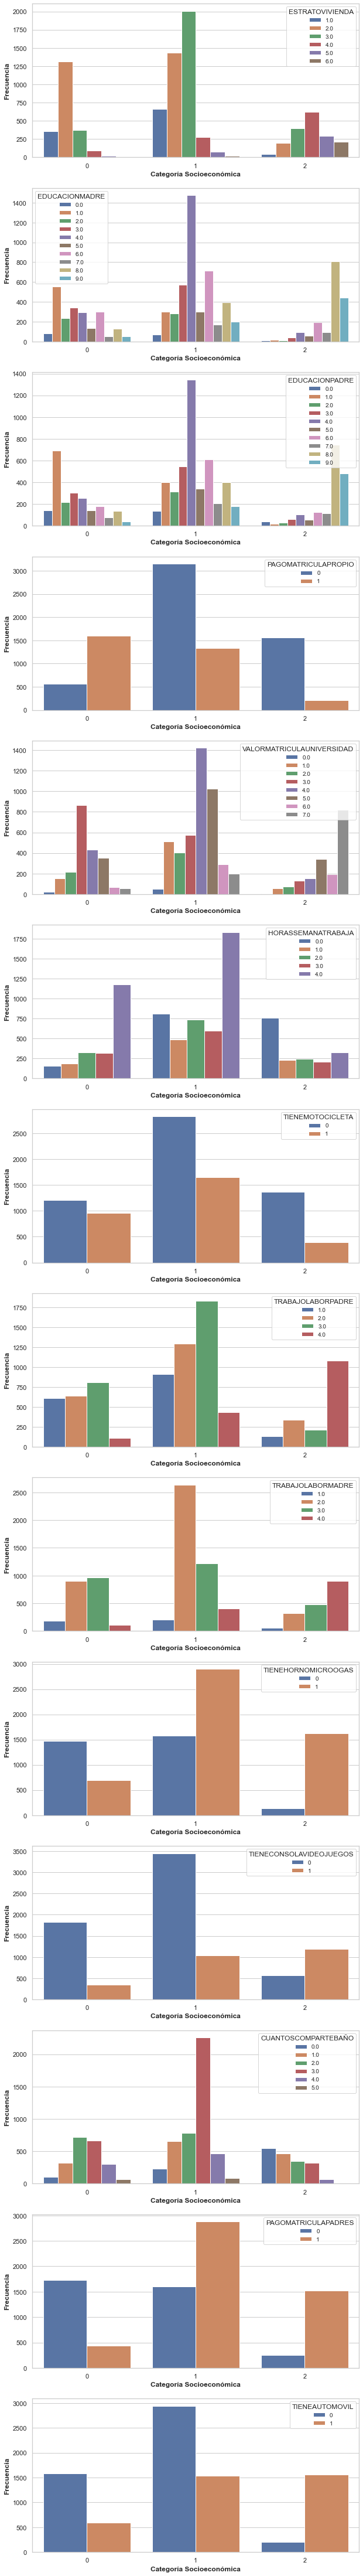

In [59]:
plt.figure(figsize= (10, 80))
for i, col in enumerate(all_features):
    plt.subplot(14,1,i+1)
    sns.countplot(x='SE_CAT', hue= col, data = X)
    plt.xlabel('Categoría Socioeconómica', fontsize = 12, fontweight ='bold')
    plt.ylabel('Frecuencia', fontsize = 12, fontweight = 'bold')
    plt.legend(title = f'{col.split("_")[1]}', fontsize = 10)

El numero de cluster es llamado Categoria Socioeconomica para facilidad de analisis.

De las visualizaciones se puede conluir:

●	Conforme aumenta la Cat. Socioeconomica del estudiante tambien aumenta el Estrato de su vivienda, el nivel educativo de sus padres, el valor de su matricula, el nivel laboral de sus padres, la probabilidad de que tenga horno, consola de videojuegos y automovil y la probabilidad de que sus padres paguen su matricula.

●	Conforme disminuye la Cat. Socioeconomica aumenta el numero de horas que trabaja, la probabilidad de que tenga motocicleta, la probabilidad que el estudiante pague su propia matricula y el numero de personas con las que comparte baño.



In [60]:
socio_trs = X.copy()
database.reset_index(inplace = True, drop = True)
socio_trs.reset_index(inplace = True, drop = True)
database2.reset_index(inplace = True, drop = True)

database3 = pd.concat( [database , socio_trs['SE_CAT'], database2['UNI_GRUPO']], axis = 1)
database3.drop(columns= 'INST_NOMBRE_INSTITUCION_CAT', inplace = True)

Con el fin de crear los perfiles tipologicos de los estudiantes conforme su categoria Socioeconomica, se calcula la mediana de cada una de las variables para cada categoria.

In [61]:
database3.groupby('SE_CAT').agg( 'median' ).round(0).transpose()

SE_CAT,0,1,2
GLOBAL_PUNT,138.0,146.0,162.0
FAMI_ESTRATOVIVIENDA_CAT,2.0,3.0,4.0
FAMI_EDUCACIONMADRE_CAT,3.0,4.0,8.0
FAMI_EDUCACIONPADRE_CAT,3.0,4.0,8.0
ESTU_PAGOMATRICULAPROPIO_CAT,1.0,0.0,0.0
ESTU_VALORMATRICULAUNIVERSIDAD_CAT,3.0,4.0,6.0
ESTU_HORASSEMANATRABAJA_CAT,4.0,3.0,1.0
FAMI_TIENEMOTOCICLETA_CAT,0.0,0.0,0.0
FAMI_TRABAJOLABORPADRE_CAT,2.0,3.0,4.0
FAMI_TRABAJOLABORMADRE_CAT,2.0,2.0,4.0


Los perfiles tipologicos son los siguientes:

### Categoria Socioeconomica 0:

El estudiante medio que pertenece a la categoria Socioeconomica 0 tiene las siguientes caracteristicas:

- Estudia en una IES categoria 0
- Puntua 141 en las pruebas Saber Pro 
- Es estrato 2
- Su madre completo el Bachillerato
- Su padre completo el Bachillerato
- Pago su propia matricula
- Pagan entre 1 y 2.5 millones de matricula
- Trabajan entre 21 y 30h a la semana
- No tiene motocicleta (Pero es mas probable que la tenga vs Otros grupos)
- Su padre es dueño de un negocio pequeño o tiene un trabajo de tipo auxiliar administrativo.
- Su madre trabaja en el hogar, no trabaja o estudia o trabaja como personal de limpieza, mantenimiento, seguridad o construcción o es vendedora o trabaja en atención al público.
- Tiene horno microondas o gas (Pero es menos probable vs Otros grupos)
- No tiene consola de videojuegos (Y es menos probable que la tenga vs Otros grupos)
- Comparte baño con 3 0 4 personas
- No tiene automovil (Y es menos probable que la tenga vs Otros grupos)

### Categoria Socioeconomica 1:

El estudiante medio que pertenece a la categoria Socioeconomica 1 tiene las siguientes caracteristicas:

- Estudia en una IES categoria 1
- Puntua 146 en las pruebas Saber Pro
- Es estrato 2
- Su madre completo el Bachillerato
- Su padre completo el Bachillerato
- Sus padres pagaron su matricula
- Pagan entre 2.5 y 4 millones de matricula
- Trabajan entre 21 y 30h a la semana
- No tiene motocicleta
- Su padre trabaja por cuenta propia (por ejemplo plomero, electricista) o es pensionado o es operario de máquinas o conduce vehículo
- Su madre trabaja en el hogar, no trabaja o estudia o trabaja como personal de limpieza, mantenimiento, seguridad o construcción o es vendedora o trabaja en atención al público.
- Tiene horno microondas o gas
- No tiene consola de videojuegos
- Comparte baño con 3 0 4 personas
- No tiene automovil


### Categoria Socioeconomica 2:

El estudiante medio que pertenece a la categoria Socioeconomica 2 tiene las siguientes caracteristicas:

- Puntua 161 en las pruebas Saber Pro, 
- Estudia en una IES categoria 2
- Es estrato 3
- Su madre completo el Bachillerato
- Su padre completo el Bachillerato
- Sus padres pagaron su matricula
- Pagan entre 5.5 y 7 millones de matricula
- Trabajan entre 11 y 20h a la semana
- No tiene motocicleta ( Y es menos probable que la tenga vs Otros grupos)
- Su padre trabaja por cuenta propia (por ejemplo plomero, electricista) o es pensionado o es operario de máquinas o conduce vehículo
- Su madre es dueña de un negocio pequeño o tiene un trabajo de tipo auxiliar administrativo o trabaja por cuenta propia (por ejemplo plomero, electricista) o es pensionada o es operaria de máquinas o conduce vehículos.
- Tiene horno microondas o gas (Y es mas probable que lo tenga vs Otros grupos)
- No tiene consola de videojuegos( Pero es mas probable que la tenga vs Otros grupos)
- Comparte baño con 2 personas
- Tiene automovil

Se procede a examinar las variables Socioeconomicas de los estudiantes UIS.

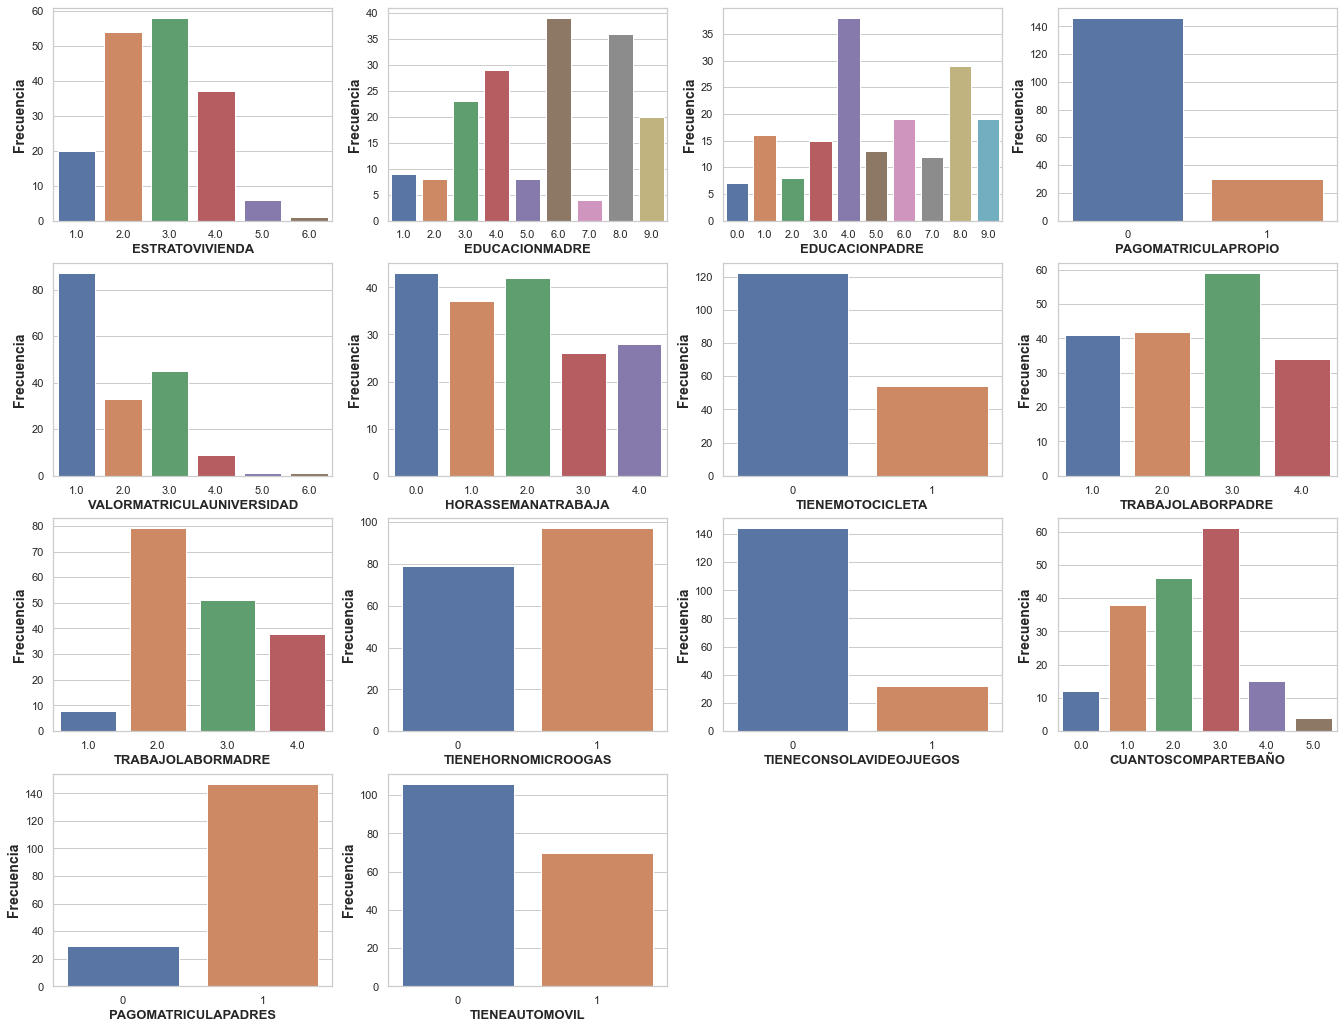

In [62]:
plt.figure(figsize=(23,18))
for i, col in enumerate(Socioeconomicas_uis.columns.drop('GLOBAL_PUNT')) :
    plt.subplot(4,4,i+1)
    sns.countplot( x= col, data = Socioeconomicas_uis)
    plt.ylabel('Frecuencia', fontsize = 14, fontweight = 'bold')
    plt.xlabel(f'{col.split("_")[1]}', fontsize = 13, fontweight = 'bold')

Los estudiantes en la UIS tienen una distribucion de variables socioeconomicas similar a la poblacion de estudiantes de todo el pais, sin embargo se identifican algunas diferencias:

●	Un reducido numero de estudiantes con estratos altos ( 5 y 6)

●	Una menor proporcion de estudiantes que pagan su matricula

●	Costes de matricula bajos, hay una cantidad minima de estudiantes con matricula superior a los 5.5 millones

●	Un menor numero de horas de trabajo

●	Una ligera mejora en el nivel educativo en los padres


Se clasifica a los estudiantes de la UIS, de acuerdo a sus perfiles tipologicos por medio del algoritmo kmodes.

In [63]:
uis_labels = km.predict(Socioeconomicas_uis.drop(columns = 'GLOBAL_PUNT'))

Con el fin de observar la clasificacion se realiza un diagrama de barras, junto con un diagrama de cajas para observar los puntajes en los diferentes niveles Socioeconomicos.

Text(0, 0.5, 'Puntaje Global')

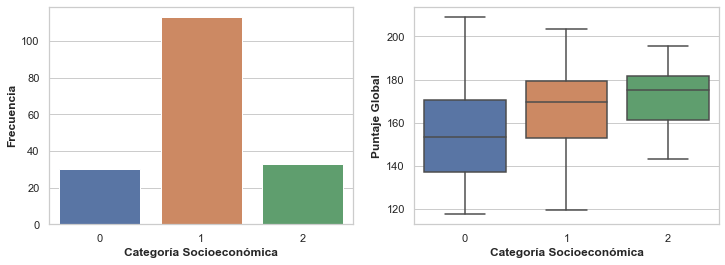

In [64]:
Socioeconomicas_uis['SE_CAT'] = uis_labels
Socioeconomicas_uis['SE_CAT'].replace({ 0:1 , 1:0 , 2:2 }, inplace=True)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x = 'SE_CAT', data = Socioeconomicas_uis)
plt.xlabel('Categoría Socioeconómica', fontsize = 12, fontweight ='bold')
plt.ylabel('Frecuencia', fontsize = 12, fontweight = 'bold')
plt.subplot(1,2,2)
sns.boxplot(x = 'SE_CAT', y = 'GLOBAL_PUNT', data = Socioeconomicas_uis)
plt.xlabel('Categoría Socioeconómica', fontsize = 12, fontweight ='bold')
plt.ylabel('Puntaje Global', fontsize = 12, fontweight = 'bold')

La mayoria de los estudiantes de la UIS estan clasificados dentro de la categoria 1. Se observa una mejora en el rendimiento medio conforme se avanza en la categoria Socioeconomica, sin embargo se puede observar que el mayor puntaje fue obtenido por un estudiante dentro de la categoria 0, esta categoria es la que tiene una mayor dispersion en sus datos, esta dispersion tambien disminuye conforme se avanza en la categoria.

In [65]:
Socioeconomicas.shape

(8412, 15)

In [66]:
Socioeconomicas_uis.shape

(176, 16)

Se crea una tabla con las categorias de las IES, con su respectiva composicion Socioeconomica.

In [67]:
pd.crosstab(database3['UNI_GRUPO'] , database3['SE_CAT'] , normalize = 'index').round(4)*100

SE_CAT,0,1,2
UNI_GRUPO,,,
0,39.82,53.51,6.67
1,23.81,63.28,12.91
2,13.74,56.40,29.86
3,7.62,26.10,66.28


Se observa que conforme se avanza en la categoria de universidad aumenta la proporcion de estudiantes de mayor categoria socioeconomica.

Se generan dos diagramas de cajas para las categorías socioeconómicas y de IES para observar su relación con el puntaje global, en las figuras 11 y 12, respectivamente. Después  en la figura 13, se hace un diagrama de cajas para las combinaciones de estas dos variables con el fin de observar detalladamente la relación que guardan con el puntaje.

Text(0, 0.5, 'Puntaje Global')

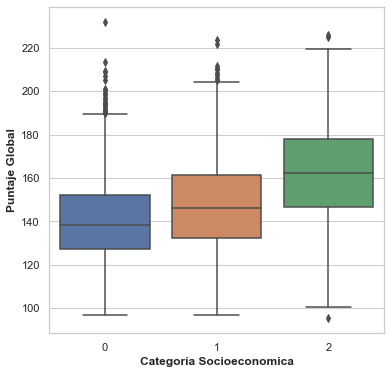

In [74]:
plt.figure(figsize= (6, 6))
sns.boxplot(x = 'SE_CAT', y = 'GLOBAL_PUNT', data= database3)
plt.xlabel('Categoría Socioeconomica', fontsize = 12, fontweight ='bold')
plt.ylabel('Puntaje Global', fontsize = 12, fontweight = 'bold')

Existe una correlacion positiva entre la categoria socioeconomica y el puntaje global.

Text(0, 0.5, 'Puntaje Global')

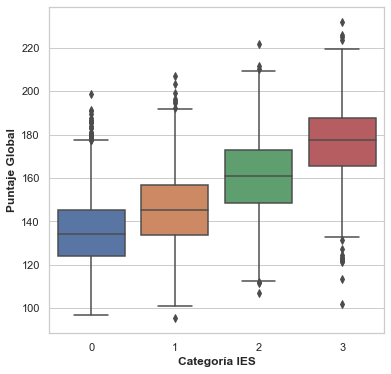

In [82]:
plt.figure(figsize= (6, 6))
sns.boxplot(x = 'UNI_GRUPO', y = 'GLOBAL_PUNT', data= database3)
plt.xlabel('Categoría IES', fontsize = 12, fontweight ='bold')
plt.ylabel('Puntaje Global', fontsize = 12, fontweight = 'bold')

Hay una fuerte correlacion positiva entre la categoria de IES y el puntaje global.

Text(0, 0.5, 'Puntaje Global')

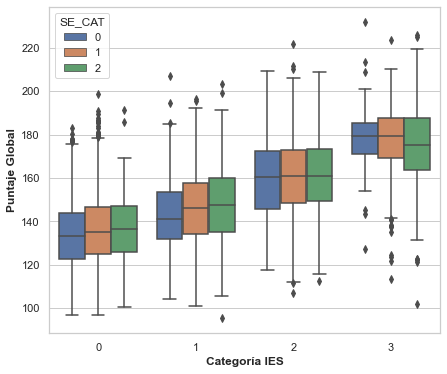

In [83]:
plt.figure(figsize= (7, 6))
sns.boxplot(x='UNI_GRUPO', y='GLOBAL_PUNT', data= database3, hue = 'SE_CAT' )
plt.xlabel('Categoría IES', fontsize = 12, fontweight ='bold')
plt.ylabel('Puntaje Global', fontsize = 12, fontweight = 'bold')

A primera vista, segun la primera grafica pareceria que la categoria socioeconomica tiene una clara influencia sobre el puntaje global, pero al ver de cerca la tercera grafica observamos que esta influencia no es tan significativa, si bien dentro de los 3 primeros grupos de IES hay una leve tendencia a la alza en el puntaje global conforme aumenta la categoria socioeconomica, gran parte de la relacion inicial es resultado de que conforme aumenta el nivel socioeconomico hay una mayor probabilidad de pertenecer a una mejor IES, es decir hay una sobrerepresentacion de los niveles socioeconomicos mas altos en las mejores IES.

Con el fin de explorar la significancia estadistica de la variable socioeconomica se procede a realizar un analisis ANOVA junto con la categoria de IES.

In [78]:
formula = 'GLOBAL_PUNT ~ C(UNI_GRUPO) + C(SE_CAT) + C(UNI_GRUPO) * C(SE_CAT)'
model = ols( formula , data= database3).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(UNI_GRUPO),3.0,1.659588e+06,553195.879119,1980.431278,0.000000e+00
C(SE_CAT),2.0,9.033028e+03,4516.514097,16.169039,9.802972e-08
C(UNI_GRUPO):C(SE_CAT),6.0,4.215619e+03,702.603223,2.515307,1.962927e-02
Residual,8400.0,2.346381e+06,279.331015,NaN,NaN


Se concluye que la categoria socioeconomica si es estadisticamente significativa, sin embargo al observar el valor F de las variables se observa que tiene una influencia leve en comparacion con la categoria IES.

Con el fin de entender con mayor profundidad el comportamiento del puntaje global, su relacion con las variables academicas (Categoria IES) y las variables socioeconomicas (Categoria Socioeconomica), se ajusta un arbol de decision regresor, este modelo de apredizaje automatico supervisado realiza abstracciones faciles de comprender cuando se tiene un numero limitado de variables.

In [79]:
X = database3[['UNI_GRUPO', 'SE_CAT']].copy()
y = database3['GLOBAL_PUNT'].copy()

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, random_state = 1)

regr = DecisionTreeRegressor(max_depth = 3 , random_state = 3)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

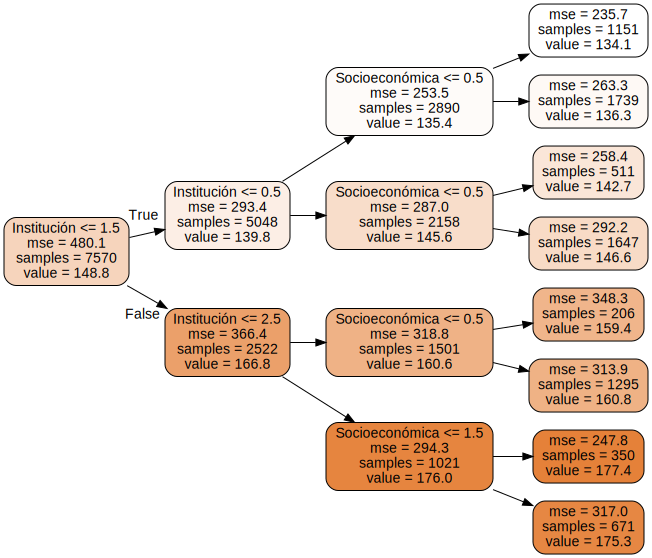

In [80]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=['Institución', 'Socioeconómica'],  
                                filled= True,
                               rotate = True,
                               rounded = True,
                               precision = 1)
graphviz.Source(dot_data, format="png")

CAT_SE = Categoria Socioeconomica
CAT_IES = Categoria Institucion

Los jerarquia de los nodos es decreciente, es decir los primeros nodos toman las decisiones mas trascendentales, el analisis y resumen del arbol se presenta a continuacion:

#### Primer Nodo (CAT IES <= 1.5) Separa a los estudiantes entre V: CAT IES 0, 1 y  F: CAT IES 2, 3

El determinante mas importante del resultado esperado de un estudiante depende de esta pregunta, si es verdadera se espera un resultado global de 139.8 en las pruebas, si es falsa 166.7, una diferencia de 26.9 puntos un poco mas que una desviacion estandar (21.8).

#### Segundo Nodo A (CAT IES <= 0.5) Separa a los estudiantes entre V: CAT IES 0  y  F: CAT IES 1

No tan significativo como el anterior nodo, si CAT IES = 0 se espera un resultado 135.4 y si CAT IES = 1 se espera 145.7, una diferencia de 10 puntos en el puntaje global.

#### Segundo Nodo B (CAT IES <= 2.5) Separa a los estudiantes entre V: CAT IES 2  y  F: CAT IES 3

Una diferencia mas amplia que en el Nodo 2A, si CAT IES = 2 se espera un resultado 160.4 y si CAT IES = 3 se espera 176.1, la diferencia es de 15.7 puntos. El numero esperado para la categoria IES 3 esta muy por encima de la media (148.75) la diferencia es de 1.25 veces la desviacion estandar, se podria decir que con solo saber que un estudiante hace parte de una institucion categoria 3 su resultado estara por encima del 89% de los demas resultados (Z = 1.25 , p = 0.894)

#### Tercer Nodo A, B, C (SE_CAT <= 0.5) Separa a los estudiantes entre V: CAT SE 0 y F: CAT SE 1, 2

Este nodo separa a los estudiantes con categoria socieconomica 0 de los demas, en los tres nodos se observan las siguientes variaciones de 2.2, 3.9 y 1.8, son pequeñas en comparacion con las variaciones resultantes de CAT IES, curiosamente los 3 nodos dividen las ramas en 0.5 indicando que las diferencias mas significativas se dan la CAT SE 0, es decir para las IES de categorias 0, 1, 2 tener un SE mayor a 0 ofrece una ligera mejora en los puntajes.

#### Tercer Nodo D (SE_CAT <= 1.5) Separa a los estudiantes entre V: CAT SE 0, 1 y F: CAT SE 2

Este nodo separa a los estudiantes con categoria socieconomica 2 de los demas en las instituciones de categoria 3, para las CAT SE 0 y 1 se espera un puntaje de 177.4 y para las Cat SE 2 se espera 175.4. Este es el unico grupo de IES, donde una menor Cat SE lleva a una mejora de los puntajes obtenidos, es decir para las IES de categorias 3 tener un SE menor a 2 ofrece una ligera mejora en los puntajes.

Se procede a acceder a los puntajes de importancia de las variables dentro del arbol de decision para constrastar la influencia de la categoria socioeconomico con la de la IES.

([<matplotlib.axis.YTick at 0x16cd6baac70>,
 [Text(0, 0, 'Institución'), Text(0, 1, 'Socioeconómica')])

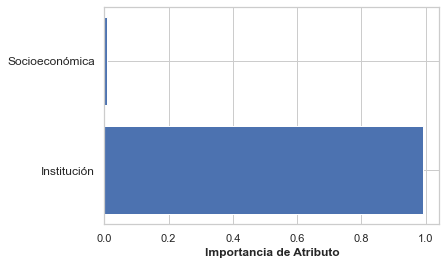

In [81]:
plt.barh(X.columns, regr.feature_importances_)
plt.xlabel('Importancia de Atributo', fontsize = 12, fontweight ='bold')
plt.yticks([0 , 1], ['Institución', 'Socioeconómica'], fontsize = 12)

Se concluye que aunque la categoria socioeconomica si es una variable util para calcular es puntaje esperado de los estudiantes, no es tan relevante como la institucion de educacion superior a la que pertenecen. Tambien se observo que hay una mayor proporcion de estudiantes con mejor categoria socioeconomica conforme se asciende en las categorias socioeconomicas.